In [1]:
import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textwrap import wrap
data = pd.read_csv("data.csv") 
data

Discipline                                     Academic level  \
0      Philosophy                                          Doctorate   
1      Philosophy                                  Bachelor's degree   
2    Neuroscience                                          Doctorate   
3           Other                                  Bachelor's degree   
4      Philosophy  Undergraduate (you have been or are in trainin...   
..            ...                                                ...   
396          None                                  Bachelor's degree   
397  Neuroscience                                          Doctorate   
398    Philosophy                                    Master's degree   
399         Other                                    Master's degree   
400         Other                                          Doctorate   

     Self-evaluation                                    Human VS Zombie  \
0                  5  Activate switch A, turning off the life suppor...   
1                  3  Activate switch A, turning off the life suppor...   
2                  4  Indifferent (press no button and let the scien...   
3                  5  Activate switch A, turning off the life suppor...   
4                  3  Activate switch A, turning off the life suppor...   
..               ...                                                ...   
396                5  Activate switch B, turning off the life suppor...   
397                5  Activate switch A, turning off the life suppor...   
398                4  Indifferent (press no button and let the scien...   
399                3  Indifferent (press no button and let the scien...   
400                2  Indifferent (press no button and let the scien...   

                                    Human VS 5 Zombies  \
0    Activate switch A, turning off the life suppor...   
1    Activate switch A, turning off the life suppor...   
2    Indifferent (activate no switch and let the sc...   
3    Activate switch A, turning off the life suppor...   
4    Activate switch A, turning off the life suppor...   
..                                                 ...   
396  Activate switch B, turning off the life suppor...   
397  Activate switch A, turning off the life suppor...   
398  Indifferent (activate no switch and let the sc...   
399  Activate switch B, turning off the life suppor...   
400  Indifferent (activate no switch and let the sc...   

                                 Red Machine VS Zombie  \
0    Activate switch B, turning off the phenomenall...   
1        Indifferent (The scientist chooses randomly.)   
2        Indifferent (The scientist chooses randomly.)   
3        Indifferent (The scientist chooses randomly.)   
4    Activate switch B, turning off the phenomenall...   
..                                                 ...   
396  Activate switch B, turning off the phenomenall...   
397  Activate switch A, turning off the life suppor...   
398  Activate switch B, turning off the phenomenall...   
399  Activate switch B, turning off the phenomenall...   
400      Indifferent (The scientist chooses randomly.)   

                                Pain Machine VS Zombie Pain Machine  \
0    Activate room B switch turning off the phenome...          Yes   
1    Activate room B switch turning off the phenome...          Yes   
2    Activate room B switch turning off the phenome...  Indifferent   
3    Activate room B switch turning off the phenome...          Yes   
4    Activate room B switch turning off the phenome...          Yes   
..                                                 ...          ...   
396  Activate room B switch turning off the phenome...           No   
397  Activate room A switch turning off the P zombi...           No   
398  Activate room A switch turning off the P zombi...          Yes   
399  Activate room B switch turning off the phenome...          Yes   
400  Activate room B switch turning off the phenome...          Ye

In [2]:
# DEFINE ANSWERS DICTIONARIES
filter_keys = {
    'Discipline' : 
        {
            'Philosophy' : 'Philosophy',
            'Neuroscience' : 'Neuroscience',
            'Cognitive psychology' : 'Cognitive psychology',
            'None' : 'None',
            'Other' : 'Other'
           },
    'Academic level' : 
        {
            'Doctorate' : 'Doctorate',
            'Master' : "Master's degree",
            'Bachelor' : "Bachelor's degree",
            'Undergraduate' : 'Undergraduate (you have been or are in training but you have no diploma)',
            'None' : 'None'
        },
    'Self-evaluation' : 
        {
            '1' : '1',
            '2' : '2',
            '3' : '3',
            '4' : '4',
            '5' : '5'
        },
    'Meta-ethical stance' : 
        {
            'Moral realism' : 'Moral realism',
            'Anti-realism, subjectivism, relativism' : 'Anti-realism/subjectivism/relativism',
            'Nihilism' : 'Nihilism',
            'Unsure, none': 'Unsure/none',
            'Other' : 'Other',
        },
    'Ethical stance' : 
        {
            'Virtue ethics' : 'Virtue ethics',
            'Deontological ethics' : 'Deontological ethics',
            'Consequentialist ethics' : 'Consequentialist ethics',
            'Unsure, none' : 'Unsure/none',
            'Other' : 'Other'
        },
    'Monism VS Pluralism' : 
        {
            'Value pluralism' : 'Value pluralism (Several values or “goods” may be equally correct and fundamental.)',
            'Value monism' : 'Value monism (There is only one ethical value/good shared by all valued/good things.)',
            'Unsure, none' : 'Unsure/none',
        },
    'Explanatory stance' :
        {
            'Physicalism' : 'Physicalism', 
            'Idealism' : 'Idealism',
            'Dualism' : 'Dualism',
            'Eliminativism, illusionism' : 'Eliminativism/illusionism.',
            'Neutral monism' : 'neutral monism',
            'Mysterianism' : 'Mysterianism',
            'Unsure, none' : 'Unsure/none.',
            'Other' : 'Other'
        }
}

item_keys = {
    'Human VS Zombie' : 
        {
            'Kill Zombie' : 'Activate switch A, turning off the life support for the P zombie being, waking up the phenomenally conscious being in room B.',
            'Indifferent' : 'Indifferent (press no button and let the scientist randomly choose A or B.)',
            'Kill Human' : 'Activate switch B, turning off the life support for the phenomenally conscious being, waking up the P zombie being in room A.'
        },
    'Human VS 5 Zombies' : 
        {
            'Kill 5 Zombies' : 'Activate switch A, turning off the life support sustaining the five P zombie beings, waking up the phenomenally conscious being in room B.',
            'Indifferent' : 'Indifferent (activate no switch and let the scientist randomly choose A or B.)',
            'Kill Human' : 'Activate switch B, turning off the life support for the phenomenally conscious being, waking up the five P zombie beings in room A.'
        },
    'Red Machine VS Zombie' : 
        {
            'Kill Red Machine' : 'Activate switch B, turning off the phenomenally conscious machine with a single experience of red, preserving the P zombie being in room A.',
            'Indifferent' : 'Indifferent (The scientist chooses randomly.)',
            'Kill Zombie' : 'Activate switch A, turning off the life support for the P zombie being in room A, preserving the phenomenally conscious machine with a single experience of red.'
        },
    'Pain Machine VS Zombie' : 
        {
            'Kill Pain Machine' : 'Activate room B switch turning off the phenomenally conscious machine with a single constant experience of pain, preserving the P zombie being.',
            'Kill Zombie' : 'Activate room A switch turning off the P zombie being’s life support, preserving the machine with a single constant experience of pain.',
            'Indifferent' : 'Indifferent (the scientist will randomly choose.)'
        },
    'Pain Machine' : 
        {
            'Yes' : 'Yes',
            'No' : 'No',
            'Indifferent' : 'Indifferent'
        },
    'Pleasure Machine VS Zombie' : 
        {
            'Kill Pleasure Machine' : 'Button B, turning off the machine experiencing a single constant experience of happiness, waking up the P zombie being.',
            'Kill Zombie' : 'Button A, turning off the life support for the P zombie being, preserving the machine with a single constant experience of happiness.',
            'Indifferent' : 'Indifferent (the scientist will randomly choose.)'
        },
    'Kill VS Zombify (other)' :
        {
            'Zombify' : 'Turn them into a philosophical zombie.',
            'Indifferent' : 'Indifferent (let the scientist choose randomly.)',
            'Kill' : 'Switch off their life support.'
        },
    'Kill VS Zombify (self)' : 
        {
            'Self-zombify' : 'Become a philosophical zombie.',
            'Indifferent' : 'Indifferent (the scientist chooses one randomly.)',
            'Suicide' : 'Switch off your life support.'
        }
}

In [3]:
# CLEAN DATA

data = data.dropna()

for qkey, qvalue in filter_keys.items():
    for index, row in data.iterrows():
        for akey, avalue in qvalue.items():
            if row[qkey] == avalue:
                data.at[index,qkey]= akey
                break


for qkey, qvalue in item_keys.items():
    for index, row in data.iterrows():
        for akey, avalue in qvalue.items():
            if row[qkey] == avalue:
                data.at[index,qkey]= akey
                break
data

Discipline Academic level  Self-evaluation Human VS Zombie  \
0      Philosophy      Doctorate                5     Kill Zombie   
1      Philosophy       Bachelor                3     Kill Zombie   
2    Neuroscience      Doctorate                4     Indifferent   
3           Other       Bachelor                5     Kill Zombie   
4      Philosophy  Undergraduate                3     Kill Zombie   
..            ...            ...              ...             ...   
396          None       Bachelor                5      Kill Human   
397  Neuroscience      Doctorate                5     Kill Zombie   
398    Philosophy         Master                4     Indifferent   
399         Other         Master                3     Indifferent   
400         Other      Doctorate                2     Indifferent   

    Human VS 5 Zombies Red Machine VS Zombie Pain Machine VS Zombie  \
0       Kill 5 Zombies      Kill Red Machine      Kill Pain Machine   
1       Kill 5 Zombies           Indifferent      Kill Pain Machine   
2          Indifferent           Indifferent      Kill Pain Machine   
3       Kill 5 Zombies           Indifferent      Kill Pain Machine   
4       Kill 5 Zombies      Kill Red Machine      Kill Pain Machine   
..                 ...                   ...                    ...   
396         Kill Human      Kill Red Machine      Kill Pain Machine   
397     Kill 5 Zombies           Kill Zombie            Kill Zombie   
398        Indifferent      Kill Red Machine            Kill Zombie   
399         Kill Human      Kill Red Machine      Kill Pain Machine   
400        Indifferent           Indifferent      Kill Pain Machine   

    Pain Machine Pleasure Machine VS Zombie Kill VS Zombify (other)  \
0            Yes      Kill Pleasure Machine                 Zombify   
1            Yes                Kill Zombie             Indifferent   
2    Indifferent                Indifferent                 Zombify   
3            Yes                Kill Zombie             Indifferent   
4            Yes      Kill Pleasure Machine             Indifferent   
..           ...                        ...                     ...   
396           No      Kill Pleasure Machine                 Zombify   
397           No                Kill Zombie                    Kill   
398          Yes                Kill Zombie                    Kill   
399          Yes      Kill Pleasure Machine             Indifferent   
400          Yes                Indifferent             Indifferent   

    Kill VS Zombify (self) Meta-ethical stance           Ethical stance  \
0             Self-zombify       Moral realism            Virtue ethics   
1              Indifferent       Moral realism     Deontological ethics   
2             Self-zombify       Moral realism             Unsure, none   
3              Indifferent       Moral realism  Consequentialist ethics   
4                  Suicide        Unsure, none             Unsure, none   
..                     ...                 ...                      ...   
396           Self-zombify       Moral realism     Deontological ethics   
397                Suicide       Moral realism     Deontological ethics   
398           Self-zombify       Moral realism            Virtue ethics   
399            Indifferent        Unsure, none             Unsure, none   
400           Self-zombify        Unsure, none             Unsure, none   

    Monism VS Pluralism Explanatory stance  
0       Value pluralism        Physicalism  
1       Value pluralism       Unsure, none  
2       Value pluralism        Physicalism  
3       Value pluralism           Idealism  
4       Value pluralism       Unsure, none  
..                  ...                ...  
396        Value monism       Unsure, none  
397     Value pluralism        Physicalism  
398        Unsure, none        Physicalism  
399     Value pluralism       Unsure, none  
400        Unsure, none       Unsure, none  

[399 rows x 15 columns]

In [4]:
def display_proportion(qkey):
    # qkey : question name
    print(qkey)
    print('----------------------')
    print('COUNT : ')
    print(data[qkey].value_counts())
    print('PROPORTION : ')
    print(data[qkey].value_counts(normalize=True))

In [5]:
display_proportion('Human VS Zombie')

Human VS Zombie
----------------------
COUNT : 
Kill Zombie    282
Indifferent     96
Kill Human      21
Name: Human VS Zombie, dtype: int64
PROPORTION : 
Kill Zombie    0.706767
Indifferent    0.240602
Kill Human     0.052632
Name: Human VS Zombie, dtype: float64


In [6]:
def display_correlations(qkey, akey):
    print(qkey + ' : ' + akey)
    print('=====================')
    if qkey == 'Self-evaluation':
        data_cpy = data[data[qkey] == int(akey)]
    else:
        data_cpy = data[data[qkey] == akey]

    for qkey_other, qvalue in filter_keys.items():
        if qkey_other != qkey:
            print('----------------------')
            print(qkey_other)
            #print('COUNT : ')
            #print(data[qkey_other].value_counts() - data_cpy[qkey_other].value_counts())
            base_proportion = data[qkey_other].value_counts(normalize=True)
            relative_proportion = data_cpy[qkey_other].value_counts(normalize=True)
            for i in range(len((base_proportion))):
                answer = base_proportion.index[i]
                if answer in relative_proportion.index:
                    sub_proportion = relative_proportion.loc[base_proportion.index[i]]
                    compare_proportion = relative_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                else:
                    sub_proportion = 0
                    compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                print(str(answer) + ' : ' + str(round(sub_proportion * 100, 1)) + '% (' + str(round(compare_proportion * 100, 1)) + '%)')


    for qkey_other, qvalue in item_keys.items():
        if qkey_other != qkey:
            print('----------------------')
            print(qkey_other)
            #print('COUNT : ')
            #print(data[qkey_other].value_counts() - data_cpy[qkey_other].value_counts())
            base_proportion = data[qkey_other].value_counts(normalize=True)
            relative_proportion = data_cpy[qkey_other].value_counts(normalize=True)
            for i in range(len((base_proportion))):
                answer = base_proportion.index[i]
                if answer in relative_proportion.index:
                    sub_proportion = relative_proportion.loc[base_proportion.index[i]]
                    compare_proportion = relative_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                else:
                    sub_proportion = 0
                    compare_proportion = base_proportion.loc[base_proportion.index[i]]
                print(str(answer) + ' : ' + str(round(sub_proportion * 100, 1)) + '% (' + str(round(compare_proportion * 100, 1)) + '%)')


In [7]:
display_correlations('Human VS Zombie', 'Kill Zombie')

Human VS Zombie : Kill Zombie
----------------------
Discipline
Philosophy : 31.2% (-1.1%)
None : 27.0% (-0.1%)
Neuroscience : 22.0% (2.7%)
Other : 13.1% (-0.4%)
Cognitive psychology : 6.7% (-1.0%)
----------------------
Academic level
Undergraduate : 28.0% (0.2%)
Bachelor : 27.3% (0.5%)
Master : 22.7% (-2.1%)
Doctorate : 14.5% (1.0%)
None : 7.4% (0.4%)
----------------------
Self-evaluation
4 : 44.0% (0.1%)
3 : 28.7% (-0.3%)
5 : 16.7% (1.9%)
2 : 8.5% (-1.3%)
1 : 2.1% (-0.4%)
----------------------
Meta-ethical stance
Moral realism : 30.5% (0.7%)
Unsure, none : 26.6% (0.3%)
Anti-realism, subjectivism, relativism : 24.1% (1.8%)
Other : 10.3% (-1.2%)
Nihilism : 8.5% (-1.5%)
----------------------
Ethical stance
Unsure, none : 39.4% (2.3%)
Consequentialist ethics : 28.0% (1.4%)
Virtue ethics : 16.3% (-2.0%)
Deontological ethics : 9.6% (-0.5%)
Other : 6.7% (-1.3%)
----------------------
Monism VS Pluralism
Value pluralism : 67.4% (2.0%)
Unsure, none : 22.3% (-1.0%)
Value monism : 10.3% (-1

In [8]:
def plot_base_proportion(qkey):
    mplt.style.use('seaborn-pastel')
    labels = data[qkey].value_counts(normalize=True).index
    sizes = data[qkey].value_counts(normalize=True).values

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')

    plt.show()

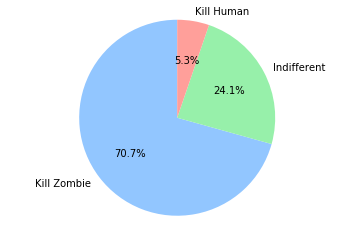

In [9]:
plot_base_proportion('Human VS Zombie')

In [10]:
def plot_all_base_proportions_items():
    mplt.style.use('seaborn-pastel')
    fig1, axs = plt.subplots(4,2, figsize = (16,24))
    #fig1.suptitle('This is a somewhat long figure title', fontsize=16)
    for i, key in enumerate(item_keys):
        labels = data[key].value_counts(normalize=True).index
        population = data[key].value_counts().values
        
        def func(pct):
            absolute = int(pct/100.*sum(population))
            return "{:.1f}%\n({:d})".format(pct, absolute)

        axs[int((i/2)%4), int(i%2)].pie(population, labels=labels, autopct=lambda pct: func(pct), startangle=90)
        axs[int((i/2)%4), int(i%2)].axis('equal')
        axs[int((i/2)%4), int(i%2)].set_title(key)
    plt.savefig('Items_proportions.jpg', dpi=200, bbox_inches='tight')
    plt.show()

In [11]:
def plot_all_base_proportions_filters():
    mplt.style.use('seaborn-pastel')
    fig1, axs = plt.subplots(4,2, figsize = (16,24))
    for i, key in enumerate(filter_keys):
        labels = data[key].value_counts(normalize=True).index
        population = data[key].value_counts().values
        
        def func(pct):
            absolute = int(pct/100.*sum(population))
            return "{:.1f}%\n({:d})".format(pct, absolute)

        axs[int((i/2)%4), int(i%2)].pie(population, labels=labels, autopct=lambda pct: func(pct), startangle=90)
        axs[int((i/2)%4), int(i%2)].axis('equal')
        axs[int((i/2)%4), int(i%2)].set_title(key)
    axs[3, 1].axis('off')
    plt.savefig('Filters_proportions.jpg', dpi=200, bbox_inches='tight')
    plt.show()

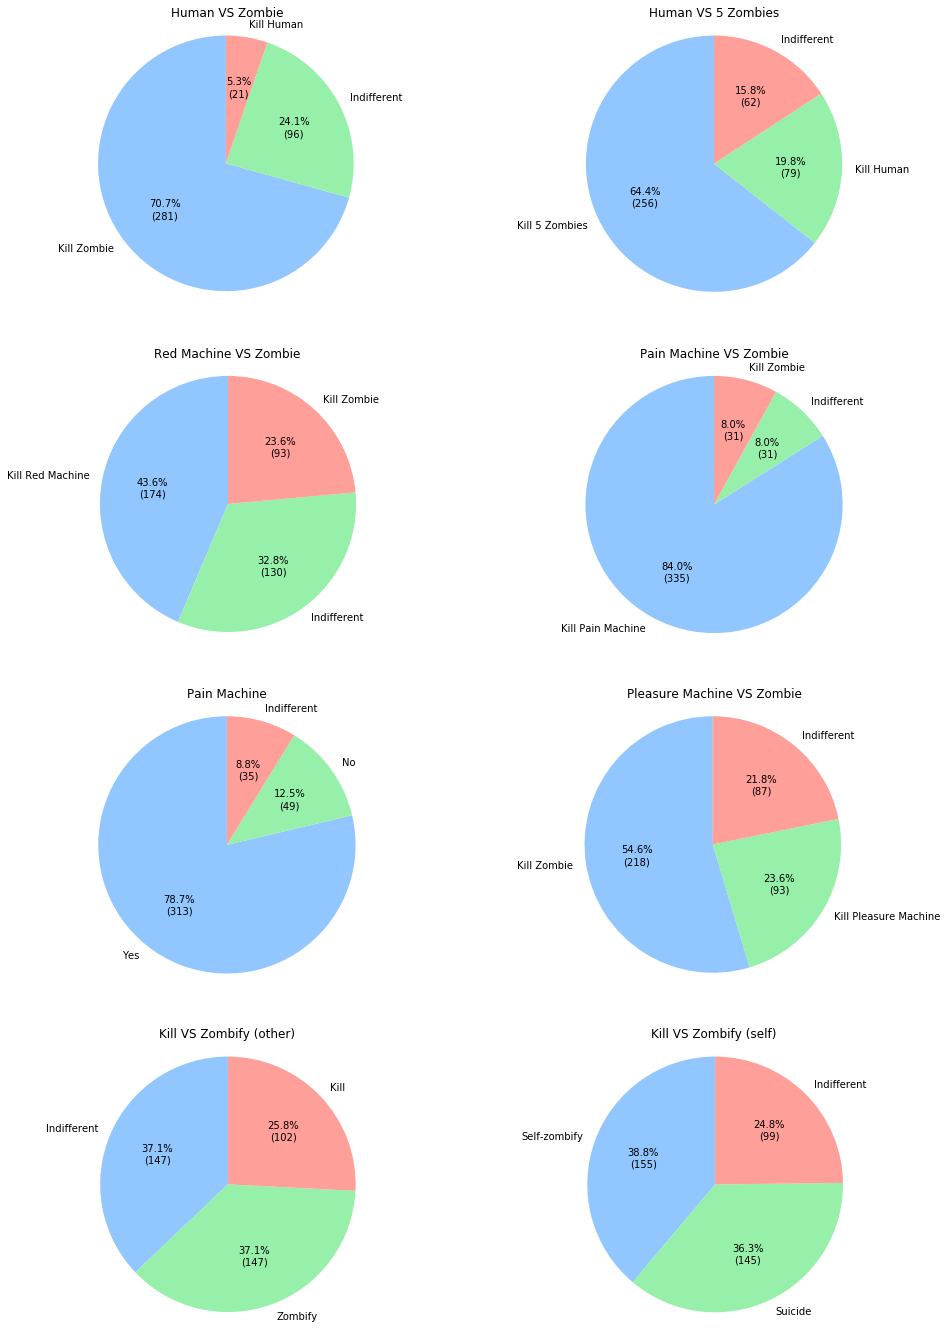

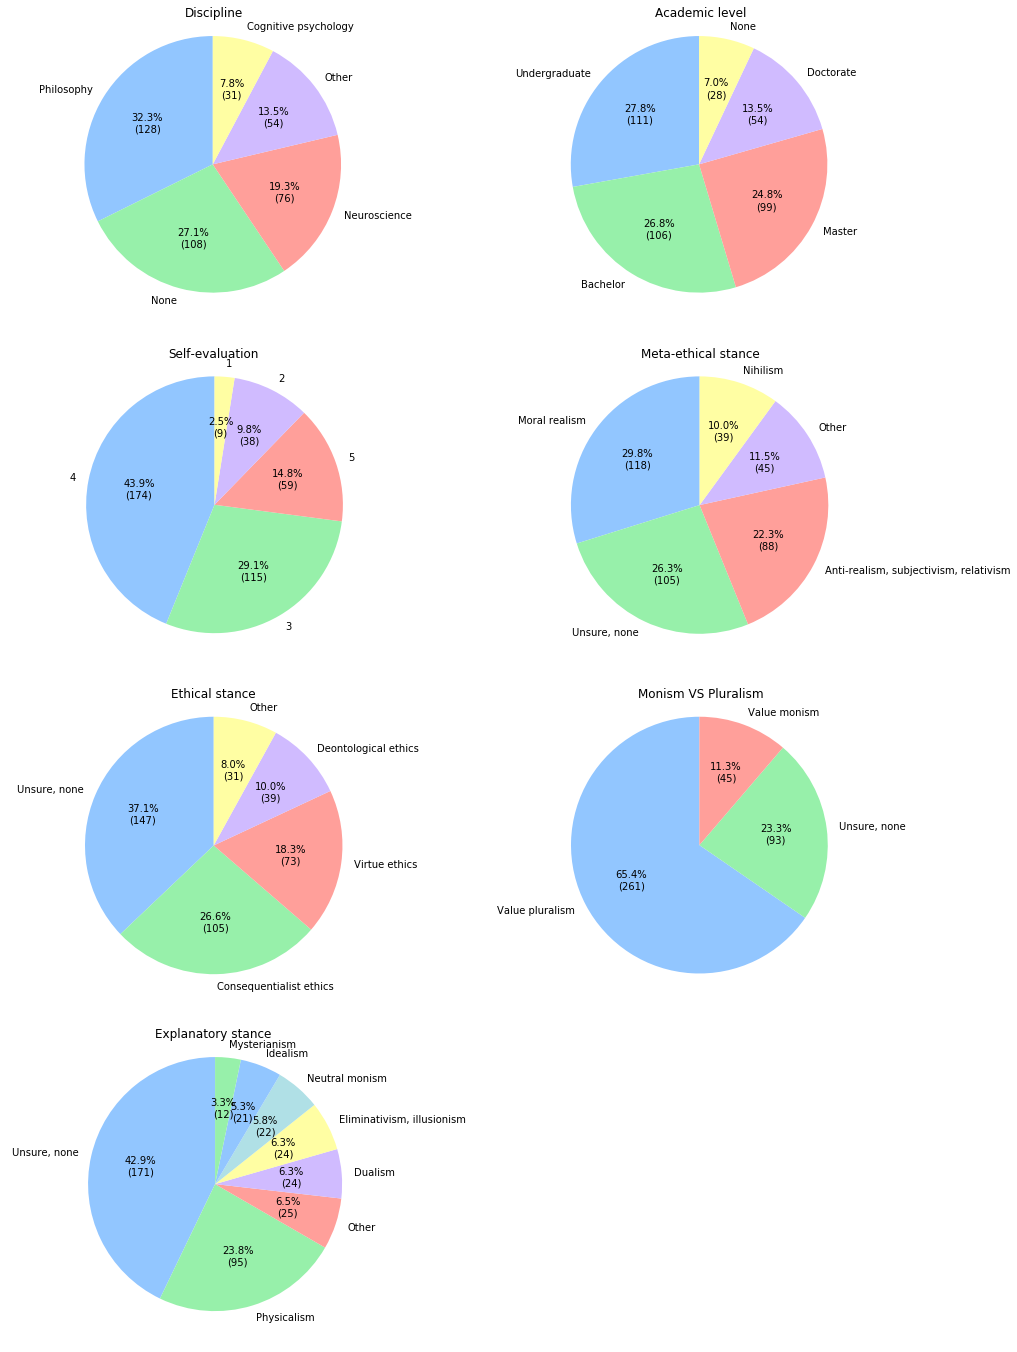

In [12]:
plot_all_base_proportions_items()
plot_all_base_proportions_filters()

In [13]:
def plot_proportions_by_filter(qfkey):
    mplt.style.use('seaborn-pastel')
    fig1, axs = plt.subplots(4, 2, figsize = (18,30))
    for pos, qikey in enumerate(item_keys.keys()):
        base_proportion = data[qikey].value_counts(normalize=True)
        answers = [answer for answer in base_proportion.index]
        all_proportions = [[prop] for prop in base_proportion]
        all_absolutes = [[absol] for absol in data[qikey].value_counts()]
        afkeys = []
        for i, afkey in enumerate(filter_keys[qfkey]):
            afkeys.append(afkey)
            if qfkey != 'Self-evaluation':
                data_cpy = data[data[qfkey] == afkey]
            else:
                data_cpy = data[data[qfkey] == int(afkey)]
            relative_proportion = data_cpy[qikey].value_counts(normalize=True)
            absolute_proportion = data_cpy[qikey].value_counts()
            for j in range(len((base_proportion))):
                answer = base_proportion.index[j]
                '''print(answer, answers, answers.index(answer))
                print(all_proportions)
                print(base_proportion.index[j])
                print(afkey, type(afkey))'''
                if answer in relative_proportion.index:
                    all_proportions[answers.index(answer)].append(relative_proportion.loc[base_proportion.index[j]])
                    all_absolutes[answers.index(answer)].append(absolute_proportion.loc[base_proportion.index[j]])
                else:
                    all_proportions[answers.index(answer)].append(0)
                    all_absolutes[answers.index(answer)].append(0)
        
        repr_count = data[qfkey].value_counts()
        repr_count_prop = data[qfkey].value_counts(normalize=True)
        
        N = len(filter_keys[qfkey])+1
        x_ax = np.arange(N)
        width = 0.75
        all_str = 'All\n' + str(data[qfkey].count())
        labels = [all_str]
        if qfkey == 'Self-evaluation':
            labels += [str('\n'.join(wrap(a, 14))) + '\n' + str(round(100 * repr_count_prop[int(a)], 1)) + '% (' + str(repr_count[int(a)]) + ')' for a in afkeys]
        else:
            labels += [str('\n'.join(wrap(a, 14))) + '\n' + str(round(100 * repr_count_prop[a], 1)) + '% (' + str(repr_count[a]) + ')' for a in afkeys]
        pa = axs[int(pos/2), int(pos%2)].bar(x_ax, all_proportions[0], width)
        pb = axs[int(pos/2), int(pos%2)].bar(x_ax, all_proportions[1], width, bottom=all_proportions[0])
        pc = axs[int(pos/2), int(pos%2)].bar(x_ax, all_proportions[2], width, bottom=np.array(all_proportions[0]) + np.array(all_proportions[1]))
        
        for i, p in enumerate(axs[int(pos/2), int(pos%2)].patches):
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            if all_proportions[int(i/N)][i%N] == 0:
                str_val = ''
            else:
                str_val = str(round(all_proportions[int(i/N)][i%N] * 100, 2)) + '%\n(' + str(all_absolutes[int(i/N)][i%N]) + ')'
            axs[int(pos/2), int(pos%2)].text(x+width/2, y+height/2, str_val, horizontalalignment='center',verticalalignment='center')
        axs[int(pos/2), int(pos%2)].set_ylabel('Proportion')
        axs[int(pos/2), int(pos%2)].set_title(qikey)
        axs[int(pos/2), int(pos%2)].set_xticks(x_ax)
        axs[int(pos/2), int(pos%2)].set_xticklabels(labels, rotation=45, rotation_mode='anchor', ha='right')
        axs[int(pos/2), int(pos%2)].set_yticks(np.arange(0, 1.01, 0.1))
        axs[int(pos/2), int(pos%2)].set_yticklabels(np.arange(0,101,10))
        axs[int(pos/2), int(pos%2)].legend((pa[0], pb[0], pc[0]), answers, loc='lower left')
        #print(repr_count)
        #print(repr_count['Virtue ethics'])
    filename = 'Proportions by ' + qfkey + '.jpg'
    plt.subplots_adjust(hspace=0.25)
    plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.show()

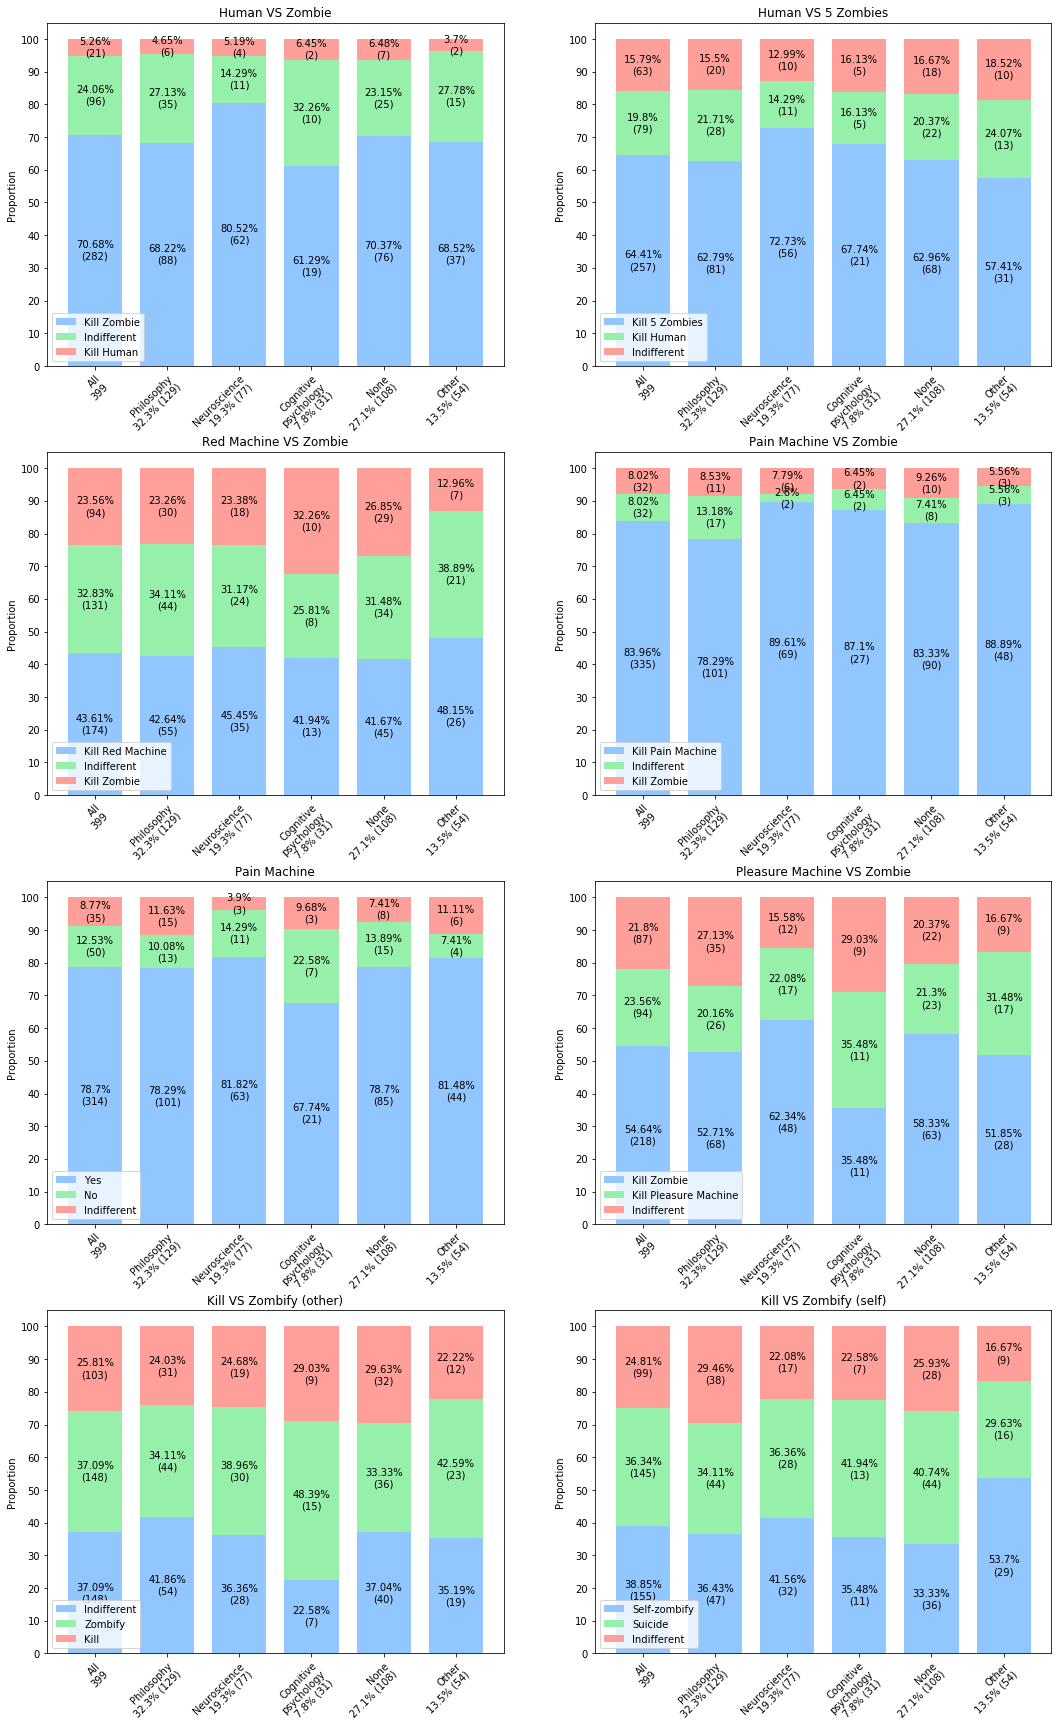

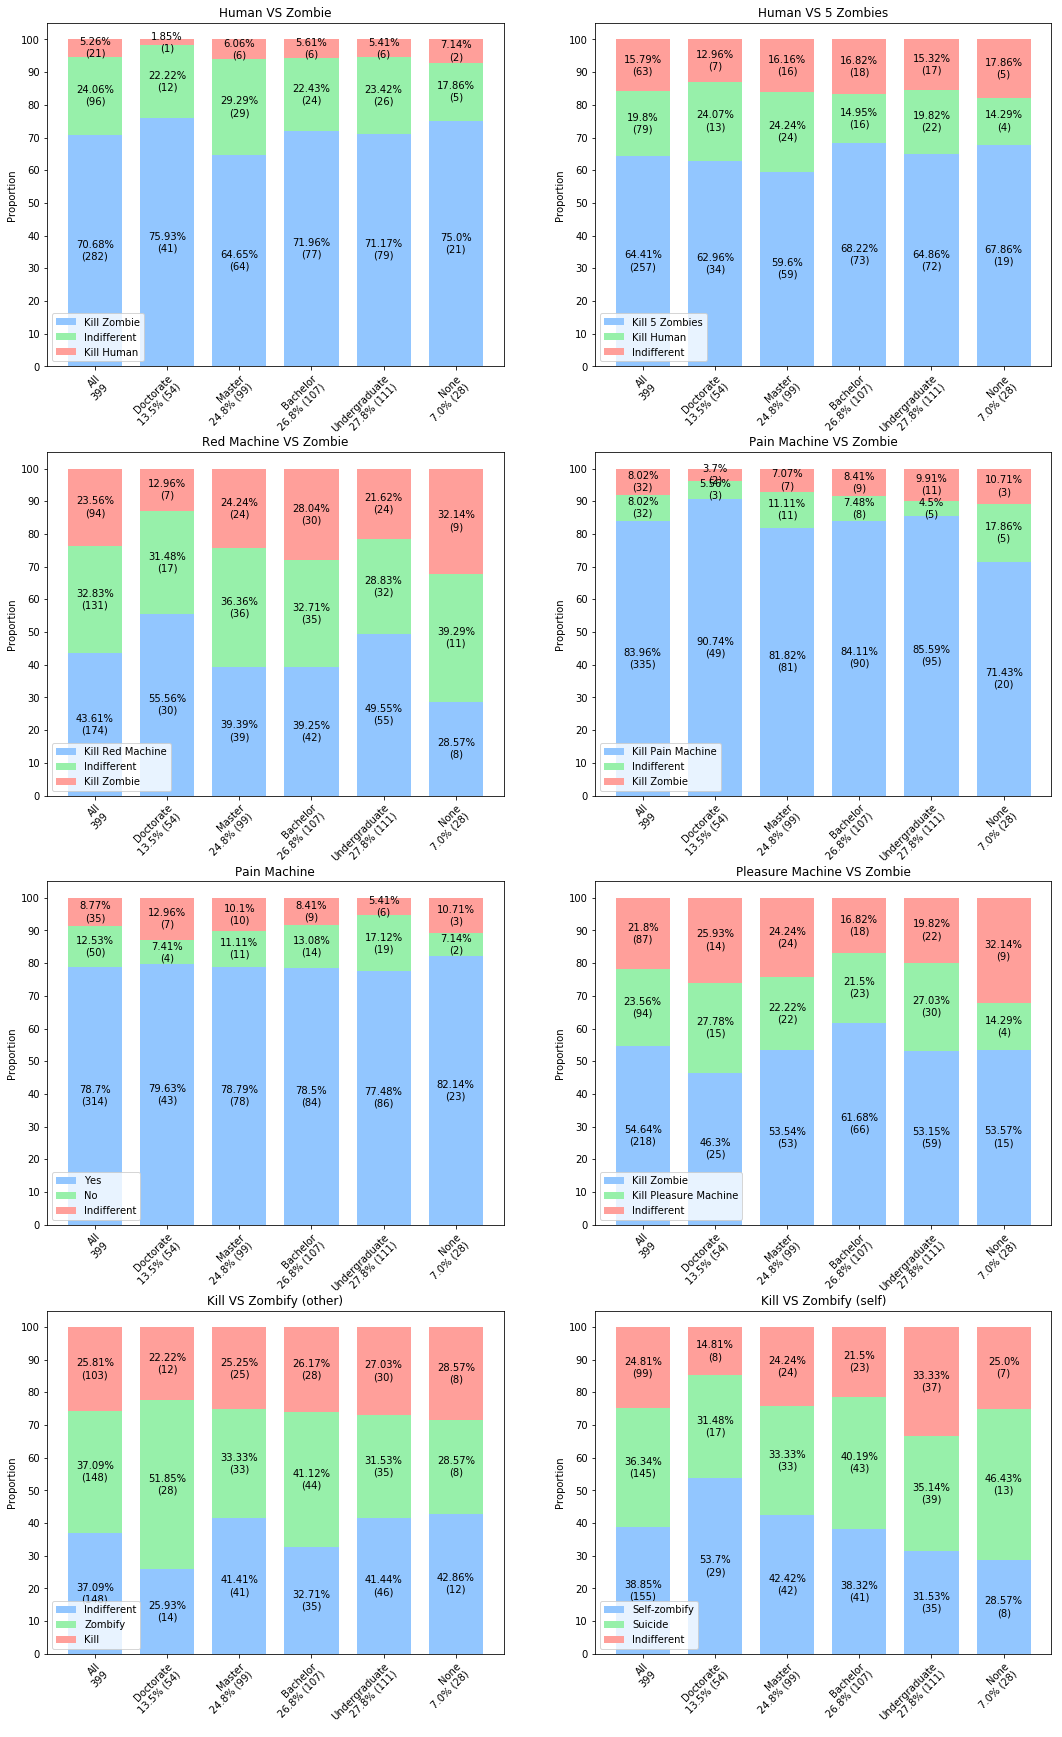

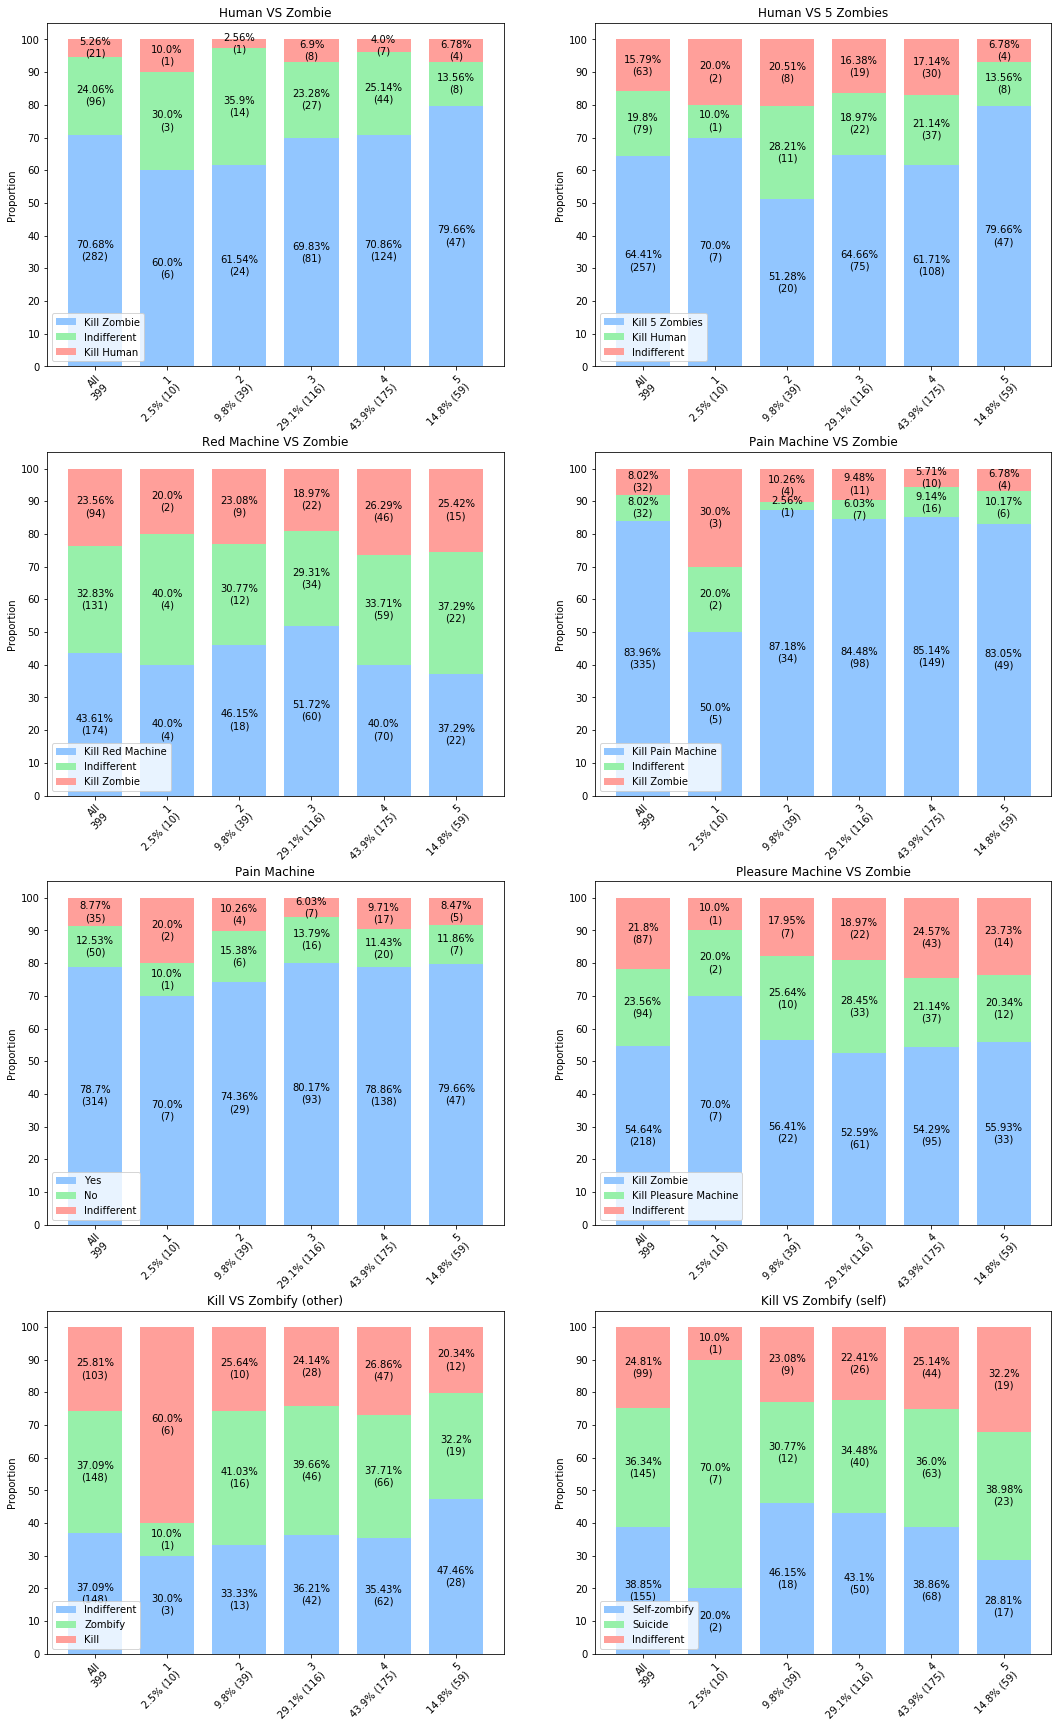

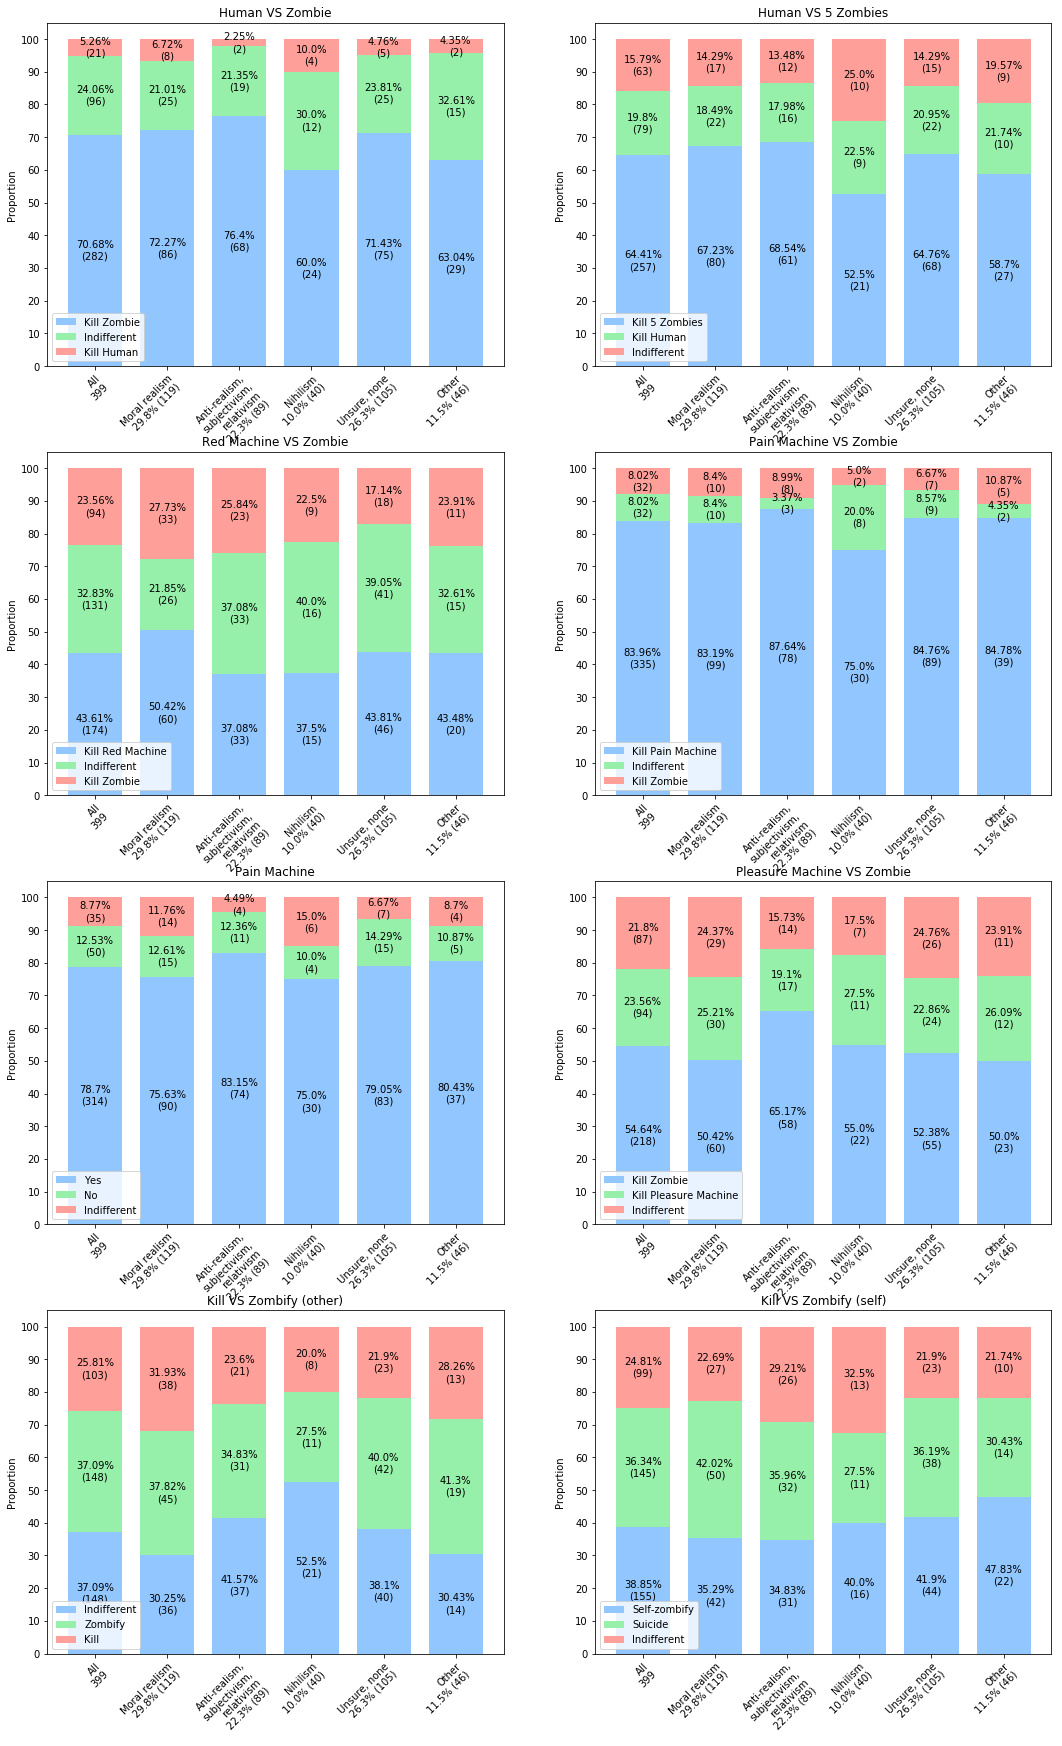

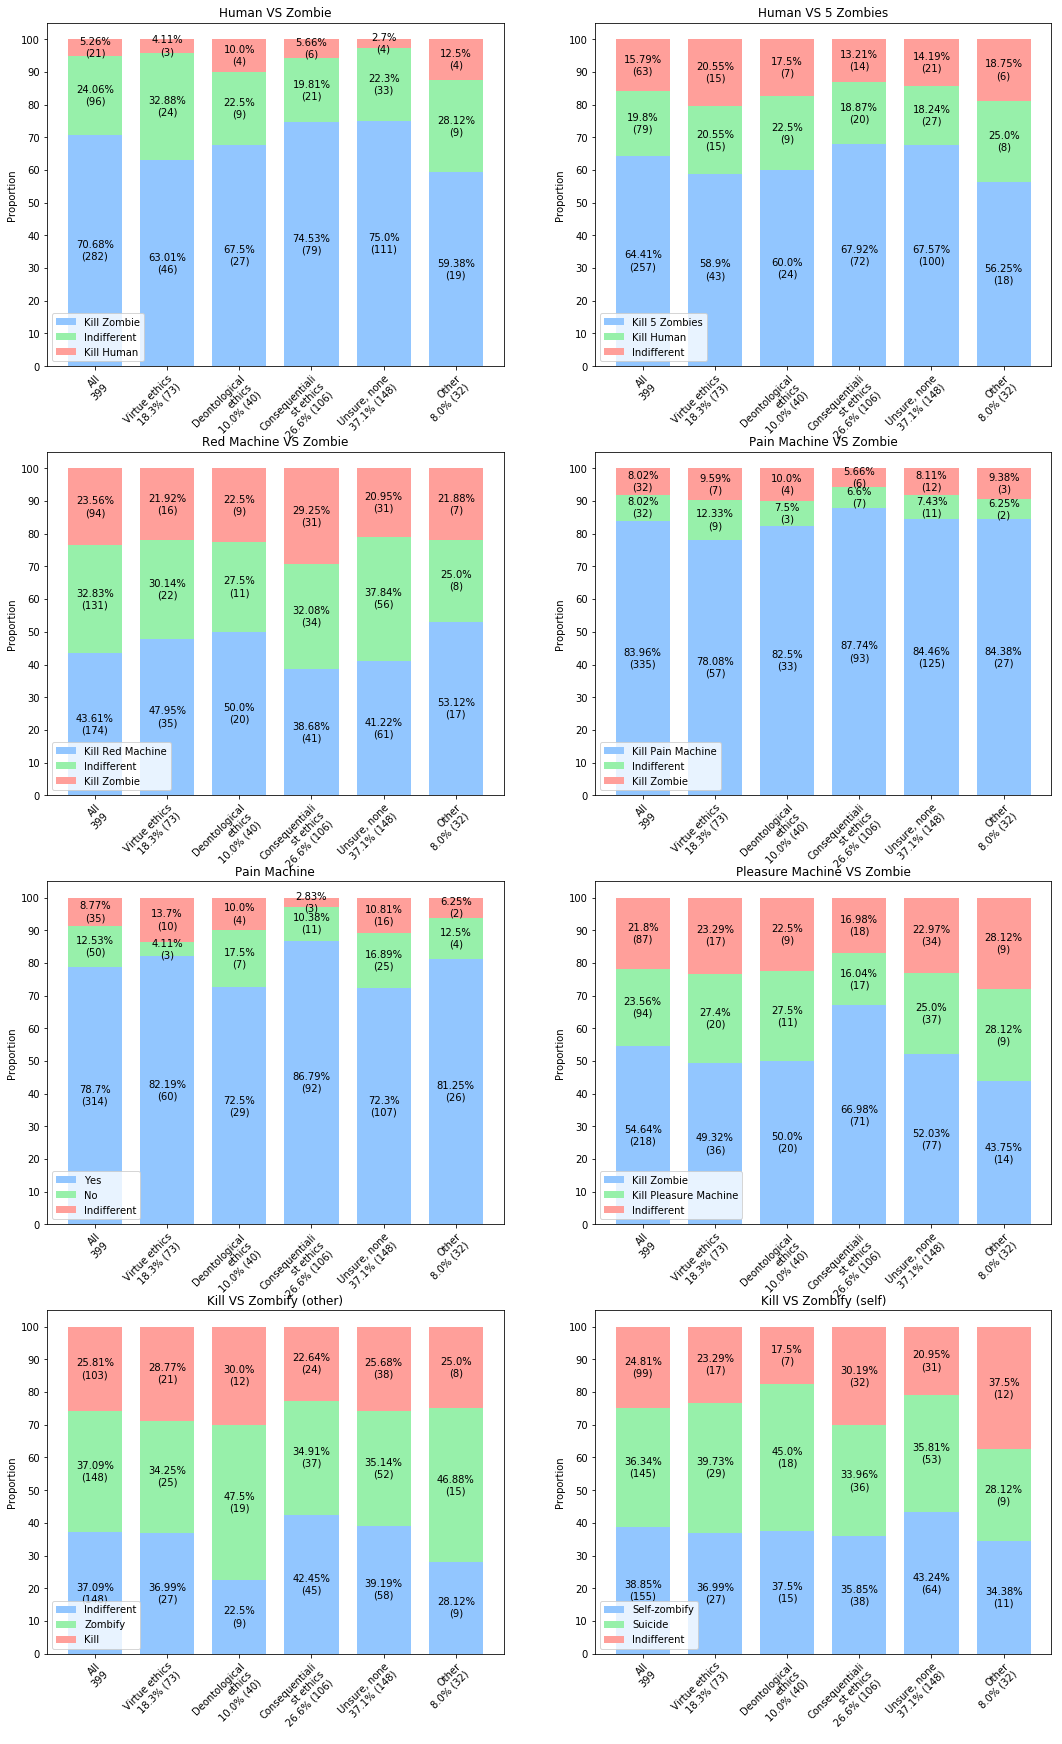

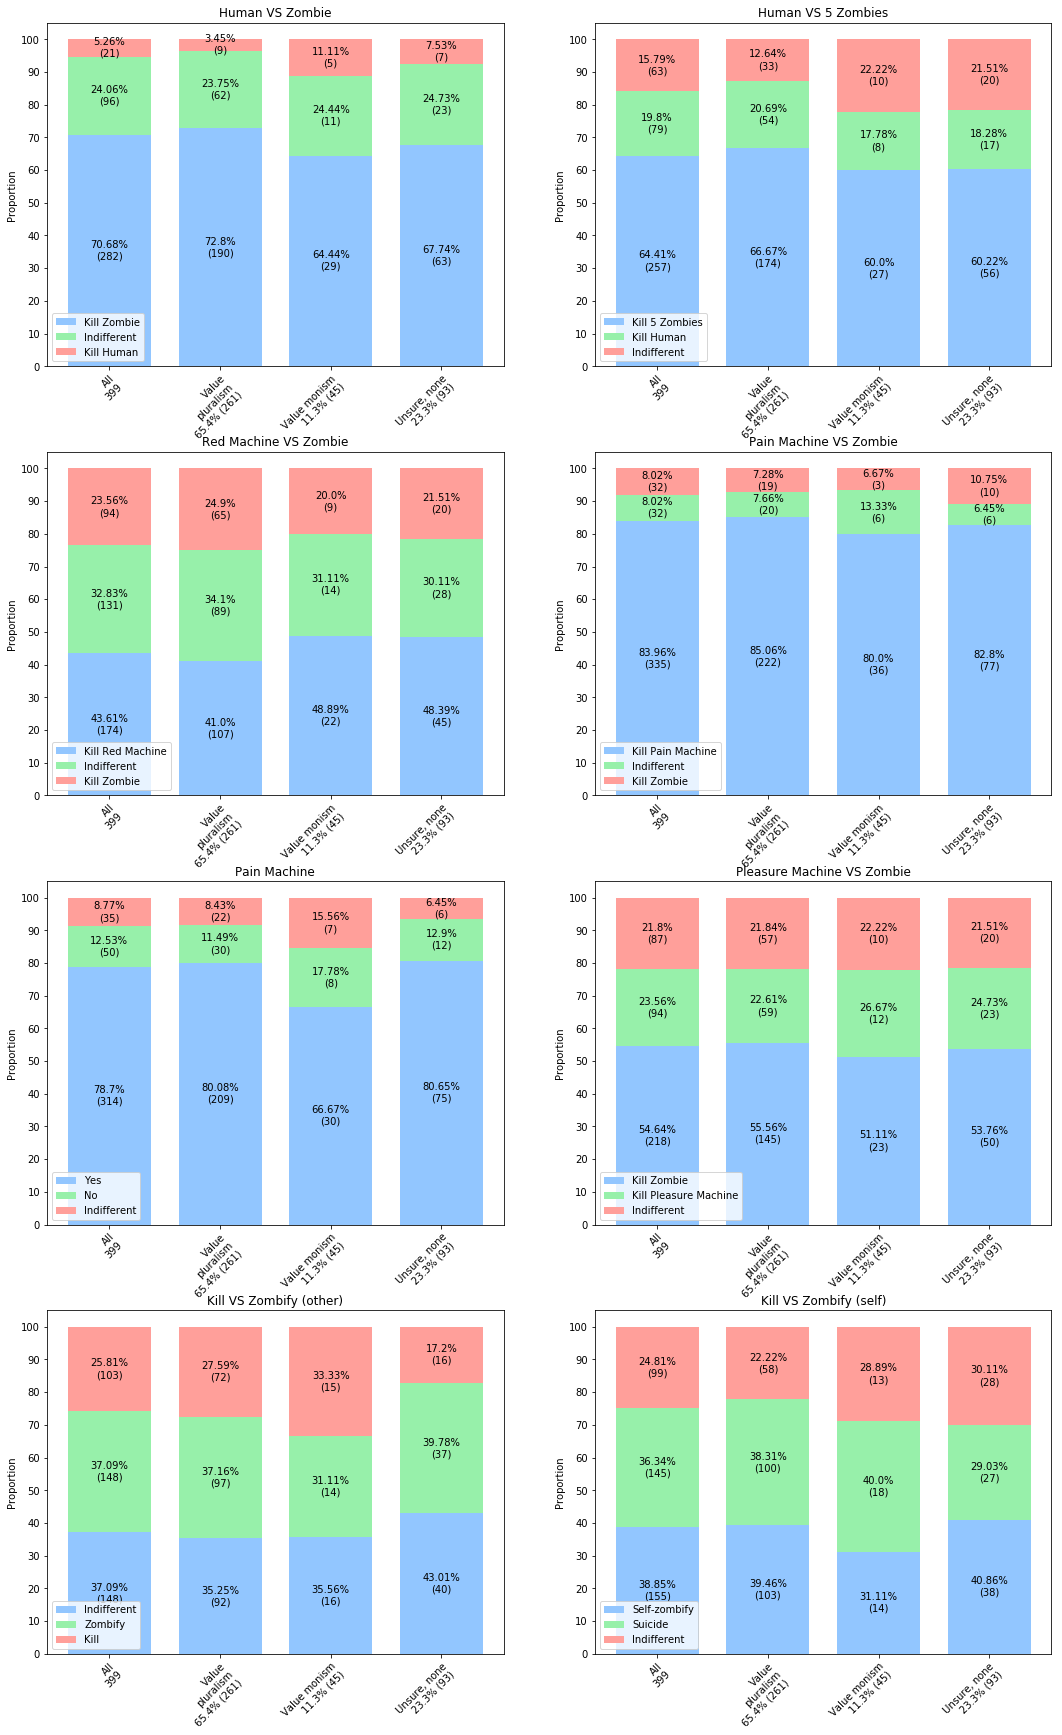

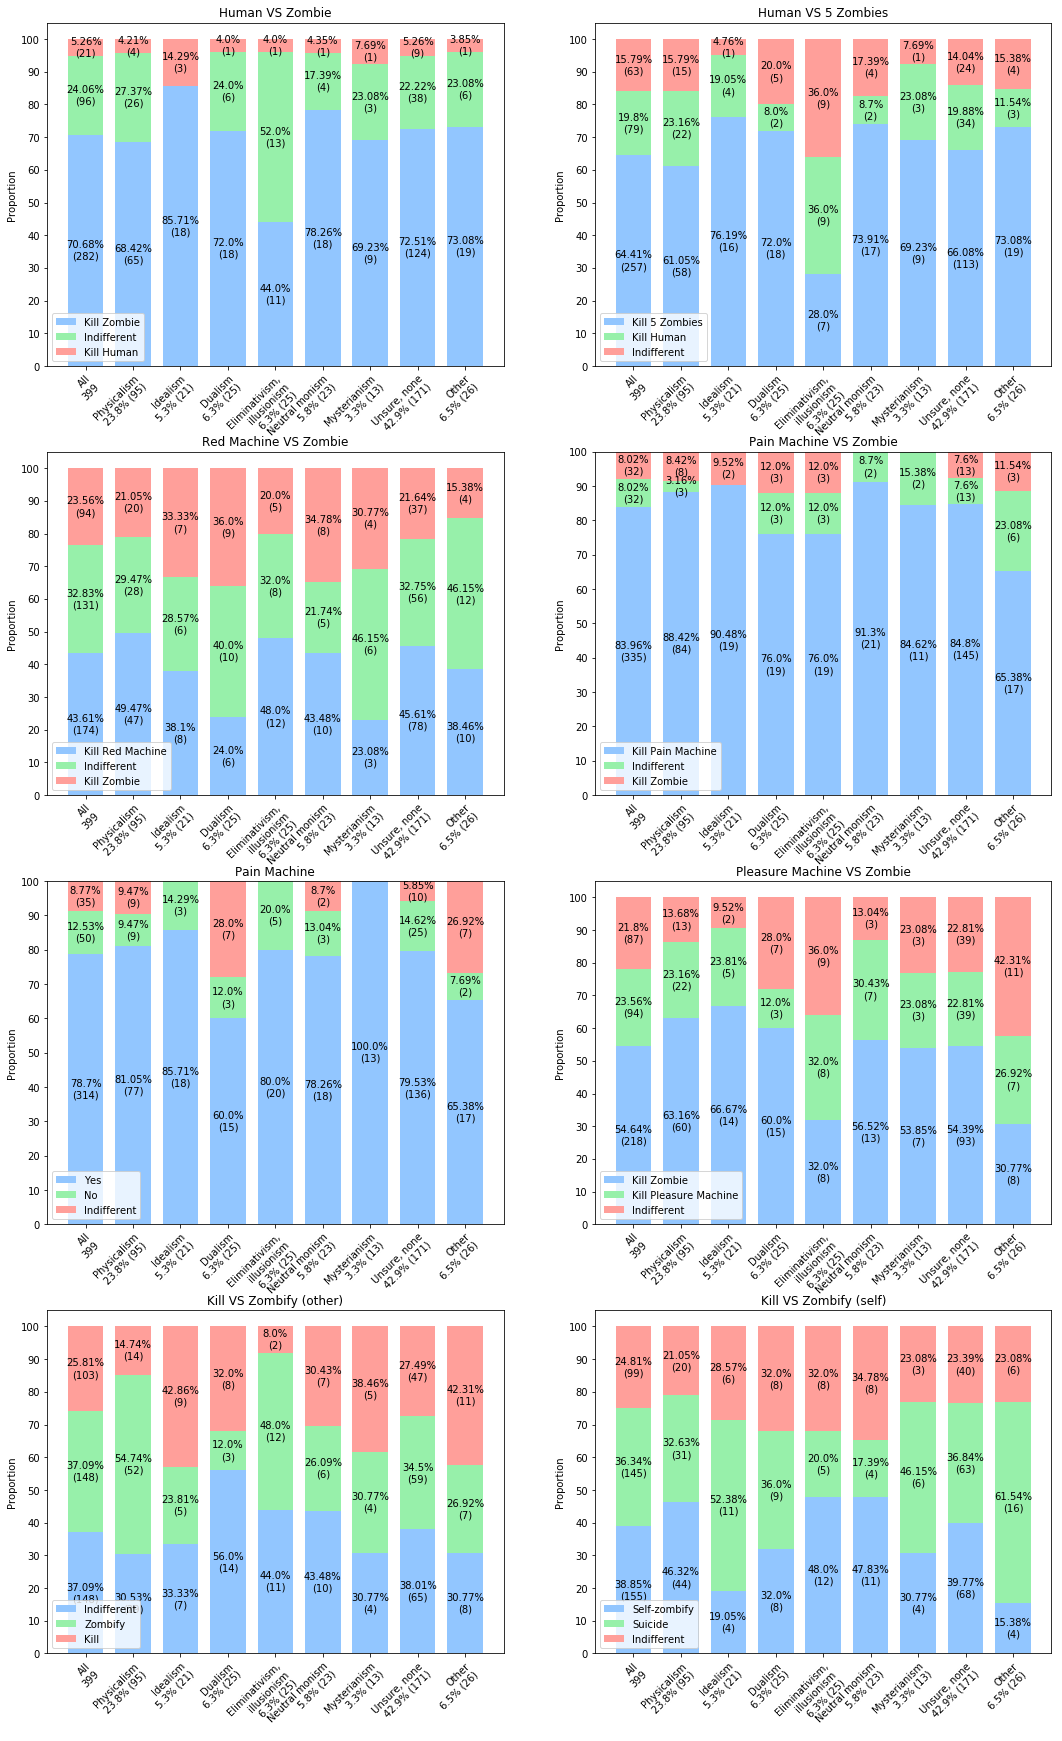

In [14]:
# Generate comparative proportion plots
for qfkey in filter_keys.keys():
    plot_proportions_by_filter(qfkey)

In [15]:
def plot_proportions_by_items():
    fig1, axs = plt.subplots(8, 8, figsize = (50,50))
    mplt.style.use('seaborn-pastel')
    for pos_x, main_qikey in enumerate(item_keys.keys()):
        for pos_y, qikey in enumerate(item_keys.keys()):
            base_proportion = data[qikey].value_counts(normalize=True)
            answers = [answer for answer in base_proportion.index]
            all_proportions = [[prop] for prop in base_proportion]
            all_absolutes = [[absol] for absol in data[qikey].value_counts()]
            main_aikeys = []
            for i, main_aikey in enumerate(item_keys[main_qikey]):
                main_aikeys.append(main_aikey)
                data_cpy = data[data[main_qikey] == main_aikey]
                relative_proportion = data_cpy[qikey].value_counts(normalize=True)
                absolute_proportion = data_cpy[qikey].value_counts()
                for j in range(len((base_proportion))):
                    answer = base_proportion.index[j]
                    if answer in relative_proportion.index:
                        all_proportions[answers.index(answer)].append(relative_proportion.loc[base_proportion.index[j]])
                        all_absolutes[answers.index(answer)].append(absolute_proportion.loc[base_proportion.index[j]])
                    else:
                        all_proportions[answers.index(answer)].append(0)
                        all_absolutes[answers.index(answer)].append(0)

            repr_count = data[main_qikey].value_counts()
            repr_count_prop = data[main_qikey].value_counts(normalize=True)

            N = len(item_keys[main_qikey])+1
            x_ax = np.arange(N)
            width = 0.75
            all_str = 'All\n' + str(data[main_qikey].count())
            labels = [all_str]
            labels += [str('\n'.join(wrap(a, 14))) + '\n' + str(round(100 * repr_count_prop[a], 1)) + '% (' + str(repr_count[a]) + ')' for a in main_aikeys]
            pa = axs[pos_y, pos_x].bar(x_ax, all_proportions[0], width)
            pb = axs[pos_y, pos_x].bar(x_ax, all_proportions[1], width, bottom=all_proportions[0])
            pc = axs[pos_y, pos_x].bar(x_ax, all_proportions[2], width, bottom=np.array(all_proportions[0]) + np.array(all_proportions[1]))

            for i, p in enumerate(axs[pos_y, pos_x].patches):
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy()
                if all_proportions[int(i/N)][i%N] == 0:
                    str_val = ''
                else:
                    str_val = str(round(all_proportions[int(i/N)][i%N] * 100, 2)) + '%\n(' + str(all_absolutes[int(i/N)][i%N]) + ')'
                axs[pos_y, pos_x].text(x+width/2, y+height/2, str_val, horizontalalignment='center',verticalalignment='center')
            axs[pos_y, pos_x].set_ylabel(qikey)
            axs[pos_y, pos_x].set_title(main_qikey)
            axs[pos_y, pos_x].set_xticks(x_ax)
            axs[pos_y, pos_x].set_xticklabels(labels, rotation=45, rotation_mode='anchor', ha='right')
            axs[pos_y, pos_x].set_yticks(np.arange(0, 1.01, 0.1))
            axs[pos_y, pos_x].set_yticklabels(np.arange(0,101,10))
            axs[pos_y, pos_x].legend((pa[0], pb[0], pc[0]), answers, loc='lower left')
    filename = 'Cross correlation by items.jpg'
    plt.subplots_adjust(hspace=0.35)
    plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.show()


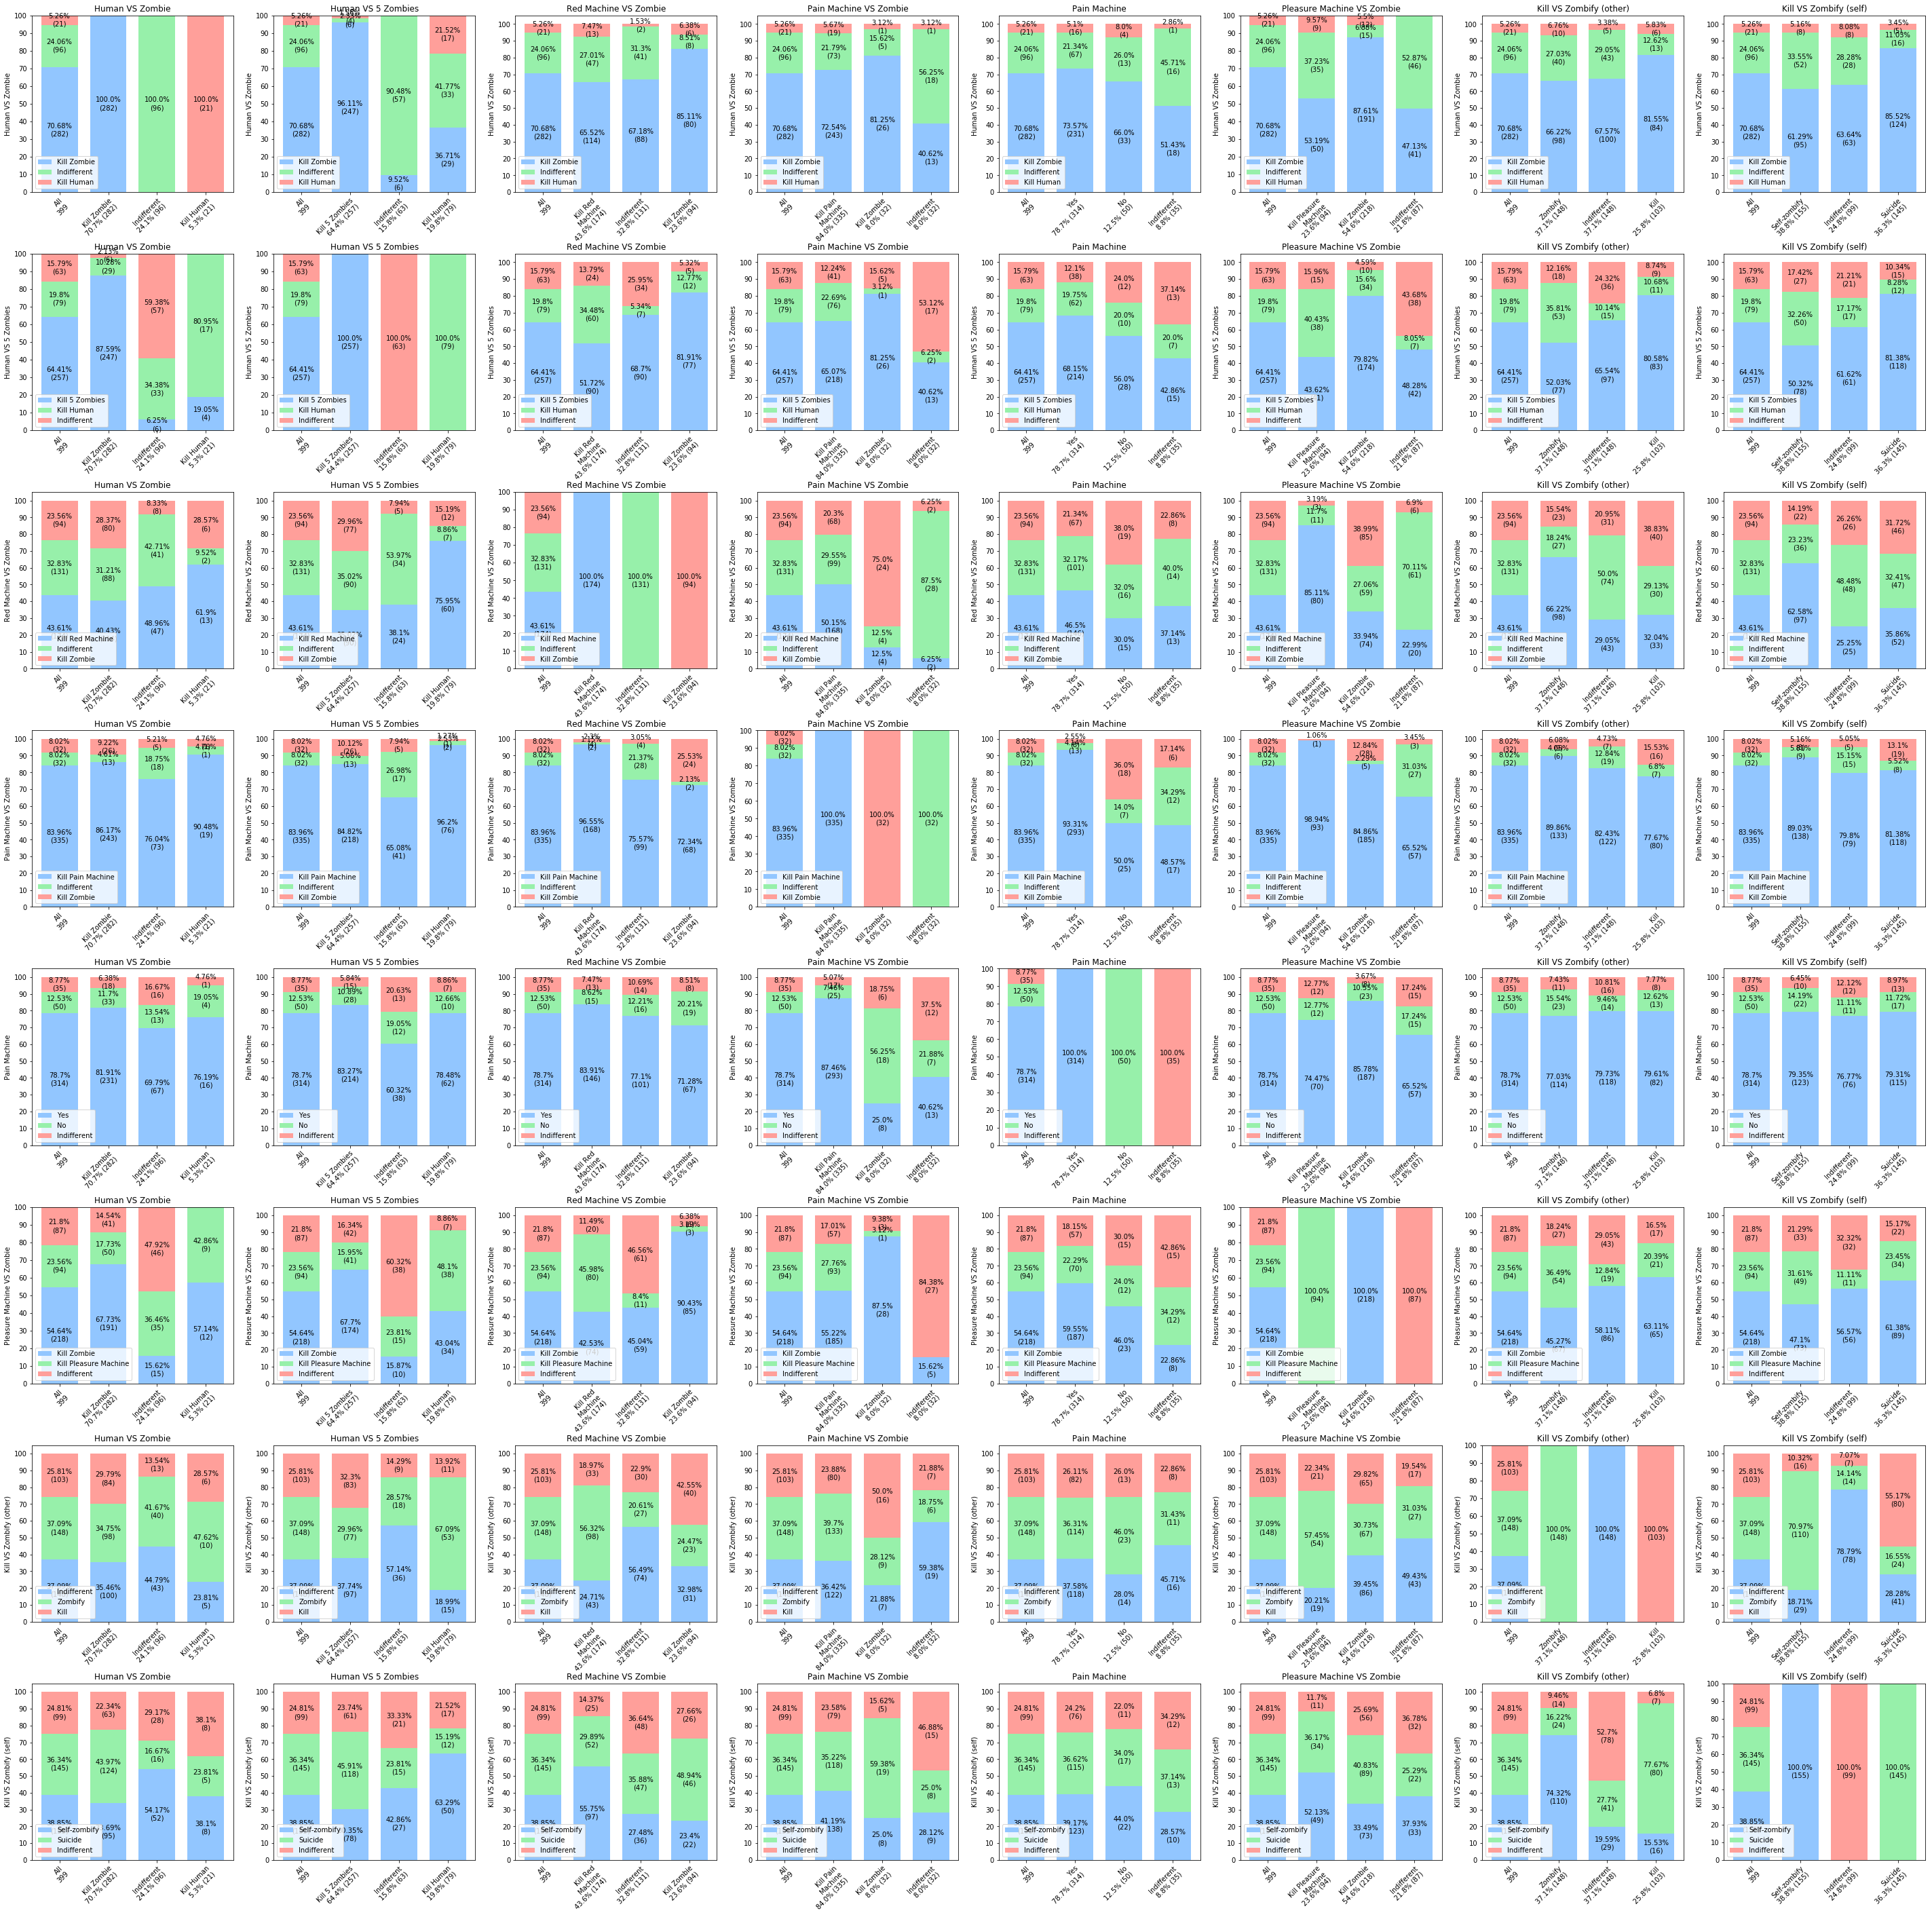

In [16]:
# Plot comparative proportions for all items
plot_proportions_by_items()

In [17]:
def plot_correlations(qkey, akey):
    
    data_cpy = data[data[qkey] == akey]
    fig1, axs = plt.subplots(7,2, figsize = (18,30))
    
    pos = 0
    for qkey_other, qvalue in filter_keys.items():
        if qkey_other != qkey:
            base_proportion = data[qkey_other].value_counts()
            relative_proportion = data_cpy[qkey_other].value_counts()
            sub_proportions = []
            compare_proportions = []
            answers = []
            for i in range(len((base_proportion))):
                answer = base_proportion.index[i]
                answers.append(answer)
                if answer in relative_proportion.index:
                    sub_proportion = relative_proportion.loc[base_proportion.index[i]]
                    compare_proportion = relative_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                    sub_proportions.append(sub_proportion)
                    compare_proportions.append(compare_proportion)
                else:
                    sub_proportion = 0
                    compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                    sub_proportions.append(sub_proportion)
                    compare_proportions.append(compare_proportion)
            labels = answers

            def func(pct, pop):
                absolute = int(pct/100.*sum(pop))
                return "{:.1f}%\n({:d})".format(pct, absolute)

            axs[int((pos/2)%7), int(pos%2)].pie(sub_proportions, labels=labels, autopct=lambda pct: func(pct, sub_proportions), startangle=90)
            axs[int((pos/2)%7), int(pos%2)].axis('equal')
            axs[int((pos/2)%7), int(pos%2)].set_title(qkey_other)
            pos += 1

    for qkey_other, qvalue in item_keys.items():
        if qkey_other != qkey:
            base_proportion = data[qkey_other].value_counts()
            relative_proportion = data_cpy[qkey_other].value_counts()
            sub_proportions = []
            compare_proportions = []
            answers = []
            for i in range(len((base_proportion))):
                answer = base_proportion.index[i]
                answers.append(answer)
                if answer in relative_proportion.index:
                    sub_proportion = relative_proportion.loc[base_proportion.index[i]]
                    compare_proportion = relative_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                    sub_proportions.append(sub_proportion)
                    compare_proportions.append(compare_proportion)
                else:
                    sub_proportion = 0
                    compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                    sub_proportions.append(sub_proportion)
                    compare_proportions.append(compare_proportion)
            labels = answers

            def func(pct, pop):
                absolute = int(pct/100.*sum(pop))
                return "{:.1f}%\n({:d})".format(pct, absolute)

            axs[int((pos/2)%7), int(pos%2)].pie(sub_proportions, labels=labels, autopct=lambda pct: func(pct, sub_proportions), startangle=90)
            axs[int((pos/2)%7), int(pos%2)].axis('equal')
            axs[int((pos/2)%7), int(pos%2)].set_title(qkey_other)
            pos += 1

    filename = 'Comparative proportions ' + qkey + ':' + akey + '.jpg'
    #plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.show()

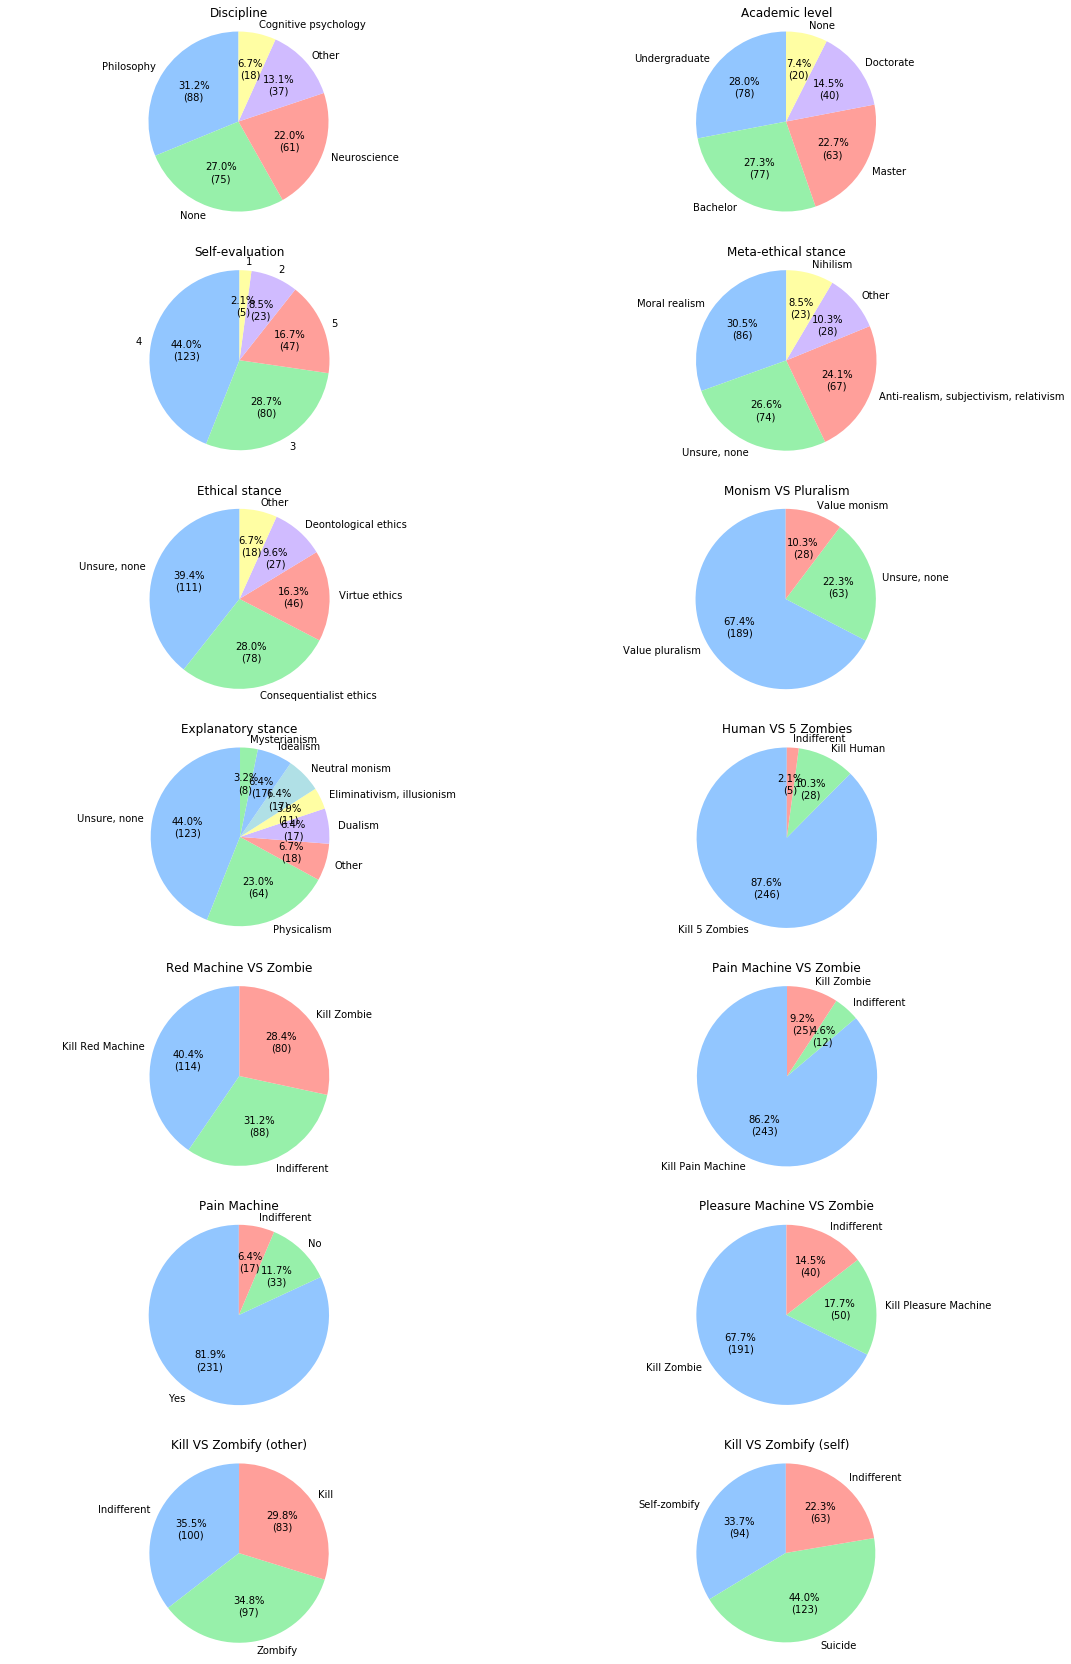

In [18]:
plot_correlations('Human VS Zombie', 'Kill Zombie')

question1:answer1 -> question2:answer2 : 

- 0 : Proportion de personnes ayant répondu answer1 et answer 2
- 1 : Variation de cette proportion par rapport à la proportion de base
- 2 : Nombre de personne ayant voté answer 1 et answer 2
- 3 : Nombre de personnes ayant voté answer 1
- 4 : Nombre de personnes représentant cette variation

In [19]:
def get_correlations_by_answer(qkey1, akey1, is_type):
    if qkey1 == 'Self-evaluation':
        data_cpy = data[data[qkey1] == int(akey1)]
    else:
        data_cpy = data[data[qkey1] == akey1]
    correlations_by_answer = pd.DataFrame()
    if is_type == 'i':
        for qkey2, qvalue in filter_keys.items():
            if qkey2 != qkey1:
                base_proportion = data[qkey2].value_counts(normalize=True)
                variable_proportion = data_cpy[qkey2].value_counts(normalize=True)
                base_values = data[qkey2].value_counts()
                variable_values = data_cpy[qkey2].value_counts()
                for i in range(len((base_proportion))):
                    akey2 = base_proportion.index[i]
                    if akey2 in variable_proportion.index:
                        sub_proportion = variable_proportion.loc[base_proportion.index[i]]
                        compare_proportion = variable_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                        variation_value = variable_values.loc[base_proportion.index[i]]
                    else:
                        sub_proportion = 0
                        compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                        variation_value = 0
                    label = str(qkey1) + ':' + str(akey1) + ' -> ' + str(qkey2) + ':' + str(akey2)
                    correlations_by_answer = correlations_by_answer.append({
                        'id' : label,
                        'Combined proportion' : round(sub_proportion*100, 2),
                        'Variation proportion' : round(compare_proportion*100, 2),
                        'Combined population' : int(variation_value),
                        'Population' : int(sum(variable_values)),
                        'Population variation' : variation_value - round((base_values.loc[base_proportion.index[i]]*sum(variable_values))/sum(base_values), 2)
                    }, ignore_index=True)

    for qkey2, qvalue in item_keys.items():
        if qkey2 != qkey1:
            base_proportion = data[qkey2].value_counts(normalize=True)
            variable_proportion = data_cpy[qkey2].value_counts(normalize=True)
            base_values = data[qkey2].value_counts()
            variable_values = data_cpy[qkey2].value_counts()
            for i in range(len((base_proportion))):
                akey2 = base_proportion.index[i]
                if akey2 in variable_proportion.index:
                    sub_proportion = variable_proportion.loc[base_proportion.index[i]]
                    compare_proportion = variable_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                    variation_value = variable_values.loc[base_proportion.index[i]]
                else:
                    sub_proportion = 0
                    compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                    variation_value = 0
                label = str(qkey1) + ':' + str(akey1) + ' -> ' + str(qkey2) + ':' + str(akey2)
                correlations_by_answer = correlations_by_answer.append({
                    'id' : label,
                    'Combined proportion' : round(sub_proportion*100, 2),
                    'Variation proportion' : round(compare_proportion*100, 2),
                    'Combined population' : int(variation_value),
                    'Population' : int(sum(variable_values)),
                    'Population variation' : variation_value - round((base_values.loc[base_proportion.index[i]]*sum(variable_values))/sum(base_values), 2)
                }, ignore_index=True)

    return correlations_by_answer

def get_all_correlations_by_answer():
    all_correlations_by_answer = pd.DataFrame()
    for qkey1, akeys1 in filter_keys.items():
        for akey1 in akeys1:
            all_correlations_by_answer = all_correlations_by_answer.append(get_correlations_by_answer(qkey1, akey1, 'f'), ignore_index=True)
    for qkey1, akeys1 in item_keys.items():
        for akey1 in akeys1:
            all_correlations_by_answer = all_correlations_by_answer.append(get_correlations_by_answer(qkey1, akey1, 'i'), ignore_index=True)

    return (all_correlations_by_answer)

all_correlations_by_answer = get_all_correlations_by_answer()
all_correlations_by_answer

Combined population  Combined proportion  Population  \
0                    88.0                68.22       129.0   
1                    35.0                27.13       129.0   
2                     6.0                 4.65       129.0   
3                    81.0                62.79       129.0   
4                    28.0                21.71       129.0   
...                   ...                  ...         ...   
2227                 34.0                23.45       145.0   
2228                 22.0                15.17       145.0   
2229                 41.0                28.28       145.0   
2230                 24.0                16.55       145.0   
2231                 80.0                55.17       145.0   

      Population variation  Variation proportion  \
0                    -3.17                 -2.46   
1                     3.96                  3.07   
2                    -0.79                 -0.61   
3                    -2.09                 -1.62   
4                     2.46                  1.91   
...                    ...                   ...   
2227                 -0.16                 -0.11   
2228                 -9.62                 -6.63   
2229                -12.78                 -8.82   
2230                -29.78                -20.54   
2231                 42.57                 29.36   

                                                     id  
0     Discipline:Philosophy -> Human VS Zombie:Kill ...  
1     Discipline:Philosophy -> Human VS Zombie:Indif...  
2     Discipline:Philosophy -> Human VS Zombie:Kill ...  
3     Discipline:Philosophy -> Human VS 5 Zombies:Ki...  
4     Discipline:Philosophy -> Human VS 5 Zombies:Ki...  
...                                                 ...  
2227  Kill VS Zombify (self):Suicide -> Pleasure Mac...  
2228  Kill VS Zombify (self):Suicide -> Pleasure Mac...  
2229  Kill VS Zombify (self):Suicide -> Kill VS Zomb...  
2230  Kill VS Zombify (self):Suicide -> Kill VS Zomb...  
2231  Kill VS Zombify (self):Suicide -> Kill VS Zomb...  

[2232 rows x 6 columns]

In [20]:
# Print all correlations
for index, row in all_correlations_by_answer.sort_values('Variation proportion', ascending=False).iterrows():
    id_ = row['id']
    var_prop = '+' if row['Variation proportion'] >= 0 else ''
    var_prop += str(row['Variation proportion']) + '%'
    comb_prop = str(row['Combined proportion']) + '%'
    pop_var = '+' if row['Population variation'] >= 0 else ''
    pop_var += str(round(row['Population variation'], 2))
    comb_pop = str(int(row['Combined population']))
    pop = str(int(row['Population']))
    print(id_ + ' :: ' + comb_prop + ' (' + var_prop + ') ' + comb_pop + '/' + pop + ' (' + pop_var + ')')

Human VS 5 Zombies:Indifferent -> Human VS Zombie:Indifferent :: 90.48% (+66.42%) 57/63 (+41.84)
Pain Machine VS Zombie:Indifferent -> Pleasure Machine VS Zombie:Indifferent :: 84.38% (+62.57%) 27/32 (+20.02)
Human VS Zombie:Kill Human -> Human VS 5 Zombies:Kill Human :: 80.95% (+61.15%) 17/21 (+12.84)
Pain Machine VS Zombie:Indifferent -> Red Machine VS Zombie:Indifferent :: 87.5% (+54.67%) 28/32 (+17.49)
Pain Machine VS Zombie:Kill Zombie -> Red Machine VS Zombie:Kill Zombie :: 75.0% (+51.44%) 24/32 (+16.46)
Pain Machine VS Zombie:Kill Zombie -> Pain Machine:No :: 56.25% (+43.72%) 18/32 (+13.99)
Human VS Zombie:Indifferent -> Human VS 5 Zombies:Indifferent :: 59.38% (+43.59%) 57/96 (+41.84)
Kill VS Zombify (self):Indifferent -> Kill VS Zombify (other):Indifferent :: 78.79% (+41.7%) 78/99 (+41.28)
Pleasure Machine VS Zombie:Kill Pleasure Machine -> Red Machine VS Zombie:Kill Red Machine :: 85.11% (+41.5%) 80/94 (+39.01)
Kill VS Zombify (other):Kill -> Kill VS Zombify (self):Suicide ::

Pleasure Machine VS Zombie:Kill Zombie -> Ethical stance:Consequentialist ethics :: 32.57% (+6.0%) 71/218 (+13.09)
Pain Machine:No -> Pain Machine VS Zombie:Indifferent :: 14.0% (+5.98%) 7/50 (+2.99)
Self-evaluation:1 -> Human VS Zombie:Indifferent :: 30.0% (+5.94%) 3/10 (+0.59)
Meta-ethical stance:Nihilism -> Human VS Zombie:Indifferent :: 30.0% (+5.94%) 12/40 (+2.38)
Academic level:Undergraduate -> Red Machine VS Zombie:Kill Red Machine :: 49.55% (+5.94%) 55/111 (+6.59)
Monism VS Pluralism:Unsure, none -> Kill VS Zombify (other):Indifferent :: 43.01% (+5.92%) 40/93 (+5.5)
Kill VS Zombify (other):Zombify -> Pain Machine VS Zombie:Kill Pain Machine :: 89.86% (+5.9%) 133/148 (+8.74)
Explanatory stance:Physicalism -> Red Machine VS Zombie:Kill Red Machine :: 49.47% (+5.86%) 47/95 (+5.57)
Monism VS Pluralism:Value monism -> Human VS Zombie:Kill Human :: 11.11% (+5.85%) 5/45 (+2.63)
Human VS 5 Zombies:Indifferent -> Meta-ethical stance:Nihilism :: 15.87% (+5.85%) 10/63 (+3.68)
Academic lev

Monism VS Pluralism:Unsure, none -> Pain Machine VS Zombie:Kill Zombie :: 10.75% (+2.73%) 10/93 (+2.54)
Pain Machine:Yes -> Ethical stance:Consequentialist ethics :: 29.3% (+2.73%) 92/314 (+8.58)
Pleasure Machine VS Zombie:Kill Zombie -> Discipline:Neuroscience :: 22.02% (+2.72%) 48/218 (+5.93)
Discipline:Neuroscience -> Kill VS Zombify (self):Self-zombify :: 41.56% (+2.71%) 32/77 (+2.09)
Pain Machine:No -> Discipline:Neuroscience :: 22.0% (+2.7%) 11/50 (+1.35)
Kill VS Zombify (self):Indifferent -> Red Machine VS Zombie:Kill Zombie :: 26.26% (+2.7%) 26/99 (+2.68)
Ethical stance:Deontological ethics -> Human VS 5 Zombies:Kill Human :: 22.5% (+2.7%) 9/40 (+1.08)
Meta-ethical stance:Nihilism -> Human VS 5 Zombies:Kill Human :: 22.5% (+2.7%) 9/40 (+1.08)
Academic level:None -> Pain Machine VS Zombie:Kill Zombie :: 10.71% (+2.69%) 3/28 (+0.75)
Kill VS Zombify (other):Indifferent -> Meta-ethical stance:Anti-realism, subjectivism, relativism :: 25.0% (+2.69%) 37/148 (+3.99)
Human VS Zombie:Ki

Pain Machine:Yes -> Discipline:Neuroscience :: 20.06% (+0.77%) 63/314 (+2.4)
Kill VS Zombify (other):Kill -> Academic level:None :: 7.77% (+0.75%) 8/103 (+0.77)
Ethical stance:Virtue ethics -> Human VS 5 Zombies:Kill Human :: 20.55% (+0.75%) 15/73 (+0.55)
Human VS Zombie:Kill Human -> Academic level:Undergraduate :: 28.57% (+0.75%) 6/21 (+0.16)
Meta-ethical stance:Unsure, none -> Human VS Zombie:Kill Zombie :: 71.43% (+0.75%) 75/105 (+0.79)
Pain Machine:No -> Explanatory stance:Idealism :: 6.0% (+0.74%) 3/50 (+0.37)
Human VS 5 Zombies:Kill 5 Zombies -> Explanatory stance:Dualism :: 7.0% (+0.74%) 18/257 (+1.9)
Kill VS Zombify (other):Zombify -> Self-evaluation:4 :: 44.59% (+0.73%) 66/148 (+1.09)
Red Machine VS Zombie:Kill Zombie -> Academic level:Master :: 25.53% (+0.72%) 24/94 (+0.68)
Meta-ethical stance:Moral realism -> Kill VS Zombify (other):Zombify :: 37.82% (+0.72%) 45/119 (+0.86)
Kill VS Zombify (other):Indifferent -> Meta-ethical stance:Unsure, none :: 27.03% (+0.71%) 40/148 (+1

Kill VS Zombify (self):Self-zombify -> Pleasure Machine VS Zombie:Indifferent :: 21.29% (-0.51%) 33/155 (-0.8)
Ethical stance:Deontological ethics -> Pain Machine VS Zombie:Indifferent :: 7.5% (-0.52%) 3/40 (-0.21)
Explanatory stance:Dualism -> Pain Machine:No :: 12.0% (-0.53%) 3/25 (-0.13)
Pain Machine VS Zombie:Kill Pain Machine -> Monism VS Pluralism:Value monism :: 10.75% (-0.53%) 36/335 (-1.78)
Kill VS Zombify (other):Indifferent -> Explanatory stance:Idealism :: 4.73% (-0.53%) 7/148 (-0.79)
Ethical stance:Unsure, none -> Kill VS Zombify (self):Suicide :: 35.81% (-0.53%) 53/148 (-0.78)
Academic level:Bachelor -> Kill VS Zombify (self):Self-zombify :: 38.32% (-0.53%) 41/107 (-0.57)
Kill VS Zombify (other):Kill -> Academic level:Master :: 24.27% (-0.54%) 25/103 (-0.56)
Academic level:Bachelor -> Pain Machine VS Zombie:Indifferent :: 7.48% (-0.54%) 8/107 (-0.58)
Pain Machine:Yes -> Self-evaluation:2 :: 9.24% (-0.54%) 29/314 (-1.69)
Kill VS Zombify (self):Suicide -> Ethical stance:Uns

Monism VS Pluralism:Unsure, none -> Pain Machine:Indifferent :: 6.45% (-2.32%) 6/93 (-2.16)
Human VS Zombie:Kill Zombie -> Kill VS Zombify (other):Zombify :: 34.75% (-2.34%) 98/282 (-6.6)
Pain Machine:No -> Kill VS Zombify (self):Suicide :: 34.0% (-2.34%) 17/50 (-1.17)
Pleasure Machine VS Zombie:Kill Pleasure Machine -> Academic level:Bachelor :: 24.47% (-2.35%) 23/94 (-2.21)
Ethical stance:Consequentialist ethics -> Pain Machine VS Zombie:Kill Zombie :: 5.66% (-2.36%) 6/106 (-2.5)
Human VS Zombie:Kill Zombie -> Explanatory stance:Eliminativism, illusionism :: 3.9% (-2.36%) 11/282 (-6.67)
Ethical stance:Consequentialist ethics -> Kill VS Zombify (self):Suicide :: 33.96% (-2.38%) 36/106 (-2.52)
Human VS Zombie:Kill Zombie -> Pain Machine:Indifferent :: 6.38% (-2.39%) 18/282 (-6.74)
Ethical stance:Unsure, none -> Red Machine VS Zombie:Kill Red Machine :: 41.22% (-2.39%) 61/148 (-3.54)
Red Machine VS Zombie:Kill Red Machine -> Academic level:Master :: 22.41% (-2.4%) 39/174 (-4.17)
Self-ev

Discipline:Other -> Pain Machine:No :: 7.41% (-5.12%) 4/54 (-2.77)
Academic level:Doctorate -> Pain Machine:No :: 7.41% (-5.12%) 4/54 (-2.77)
Discipline:Other -> Pleasure Machine VS Zombie:Indifferent :: 16.67% (-5.14%) 9/54 (-2.77)
Explanatory stance:Other -> Red Machine VS Zombie:Kill Red Machine :: 38.46% (-5.15%) 10/26 (-1.34)
Red Machine VS Zombie:Kill Red Machine -> Human VS Zombie:Kill Zombie :: 65.52% (-5.16%) 114/174 (-8.98)
Human VS Zombie:Kill Zombie -> Kill VS Zombify (self):Self-zombify :: 33.69% (-5.16%) 95/282 (-14.55)
Kill VS Zombify (self):Self-zombify -> Academic level:Undergraduate :: 22.58% (-5.24%) 35/155 (-8.12)
Human VS Zombie:Indifferent -> Explanatory stance:Idealism :: 0.0% (-5.26%) 0/96 (-5.05)
Human VS 5 Zombies:Indifferent -> Human VS Zombie:Kill Human :: 0.0% (-5.26%) 0/63 (-3.32)
Pleasure Machine VS Zombie:Indifferent -> Human VS Zombie:Kill Human :: 0.0% (-5.26%) 0/87 (-4.58)
Pain Machine:Indifferent -> Explanatory stance:Idealism :: 0.0% (-5.26%) 0/35 (

Red Machine VS Zombie:Kill Zombie -> Kill VS Zombify (other):Zombify :: 24.47% (-12.62%) 23/94 (-11.87)
Red Machine VS Zombie:Kill Red Machine -> Human VS 5 Zombies:Kill 5 Zombies :: 51.72% (-12.69%) 90/174 (-22.08)
Human VS Zombie:Kill Human -> Meta-ethical stance:Anti-realism, subjectivism, relativism :: 9.52% (-12.78%) 2/21 (-2.68)
Pain Machine VS Zombie:Indifferent -> Meta-ethical stance:Anti-realism, subjectivism, relativism :: 9.38% (-12.93%) 3/32 (-4.14)
Human VS 5 Zombies:Kill Human -> Pleasure Machine VS Zombie:Indifferent :: 8.86% (-12.94%) 7/79 (-10.23)
Kill VS Zombify (self):Suicide -> Human VS Zombie:Indifferent :: 11.03% (-13.03%) 16/145 (-18.89)
Human VS 5 Zombies:Indifferent -> Monism VS Pluralism:Value pluralism :: 52.38% (-13.03%) 33/63 (-8.21)
Pain Machine VS Zombie:Indifferent -> Discipline:Neuroscience :: 6.25% (-13.05%) 2/32 (-4.18)
Pleasure Machine VS Zombie:Kill Pleasure Machine -> Kill VS Zombify (self):Indifferent :: 11.7% (-13.11%) 11/94 (-12.32)
Self-evaluat

In [21]:
def get_correlations_by_answer(qkey1, akey1, is_type):
    if qkey1 == 'Self-evaluation':
        data_cpy = data[data[qkey1] == int(akey1)]
    else:
        data_cpy = data[data[qkey1] == akey1]
    correlations_by_answer = pd.DataFrame()
    if is_type == 'i':
        for qkey2, qvalue in filter_keys.items():
            if qkey2 != qkey1:
                base_proportion = data[qkey2].value_counts(normalize=True)
                variable_proportion = data_cpy[qkey2].value_counts(normalize=True)
                base_values = data[qkey2].value_counts()
                variable_values = data_cpy[qkey2].value_counts()
                for i in range(len((base_proportion))):
                    akey2 = base_proportion.index[i]
                    if akey2 in variable_proportion.index:
                        sub_proportion = variable_proportion.loc[base_proportion.index[i]]
                        compare_proportion = variable_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                        variation_value = variable_values.loc[base_proportion.index[i]]
                    else:
                        sub_proportion = 0
                        compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                        variation_value = 0
                    label = str(qkey1) + ':' + str(akey1) + ' -> ' + str(qkey2) + ':' + str(akey2)
                    correlations_by_answer = correlations_by_answer.append({
                        'id' : label,
                        'Combined proportion' : round(sub_proportion*100, 2),
                        'Variation proportion' : round(compare_proportion*100, 2),
                        'Combined population' : int(variation_value),
                        'Population' : int(sum(variable_values)),
                        'Population variation' : variation_value - round((base_values.loc[base_proportion.index[i]]*sum(variable_values))/sum(base_values), 2)
                    }, ignore_index=True)

    for qkey2, qvalue in item_keys.items():
        if qkey2 != qkey1:
            base_proportion = data[qkey2].value_counts(normalize=True)
            variable_proportion = data_cpy[qkey2].value_counts(normalize=True)
            base_values = data[qkey2].value_counts()
            variable_values = data_cpy[qkey2].value_counts()
            for i in range(len((base_proportion))):
                akey2 = base_proportion.index[i]
                if akey2 in variable_proportion.index:
                    sub_proportion = variable_proportion.loc[base_proportion.index[i]]
                    compare_proportion = variable_proportion.loc[base_proportion.index[i]] - base_proportion.loc[base_proportion.index[i]]
                    variation_value = variable_values.loc[base_proportion.index[i]]
                else:
                    sub_proportion = 0
                    compare_proportion = -base_proportion.loc[base_proportion.index[i]]
                    variation_value = 0
                label = str(qkey1) + ':' + str(akey1) + ' -> ' + str(qkey2) + ':' + str(akey2)
                correlations_by_answer = correlations_by_answer.append({
                    'id' : label,
                    'Combined proportion' : round(sub_proportion*100, 2),
                    'Variation proportion' : round(compare_proportion*100, 2),
                    'Combined population' : int(variation_value),
                    'Population' : int(sum(variable_values)),
                    'Population variation' : variation_value - round((base_values.loc[base_proportion.index[i]]*sum(variable_values))/sum(base_values), 2)
                }, ignore_index=True)

    return correlations_by_answer

def get_all_correlations_by_filter():
    all_correlations_by_filter = pd.DataFrame()
    for qkey1, akeys1 in filter_keys.items():
        for akey1 in akeys1:
            all_correlations_by_filter = all_correlations_by_filter.append(get_correlations_by_answer(qkey1, akey1, 'f'), ignore_index=True)

    return (all_correlations_by_filter)

all_correlations_by_filter = get_all_correlations_by_filter()
all_correlations_by_filter

Combined population  Combined proportion  Population  \
0                   88.0                68.22       129.0   
1                   35.0                27.13       129.0   
2                    6.0                 4.65       129.0   
3                   81.0                62.79       129.0   
4                   28.0                21.71       129.0   
..                   ...                  ...         ...   
859                  7.0                26.92        26.0   
860                 11.0                42.31        26.0   
861                  4.0                15.38        26.0   
862                 16.0                61.54        26.0   
863                  6.0                23.08        26.0   

     Population variation  Variation proportion  \
0                   -3.17                 -2.46   
1                    3.96                  3.07   
2                   -0.79                 -0.61   
3                   -2.09                 -1.62   
4                    2.46                  1.91   
..                    ...                   ...   
859                 -2.64                -10.17   
860                  4.29                 16.49   
861                 -6.10                -23.46   
862                  6.55                 25.20   
863                 -0.45                 -1.74   

                                                    id  
0    Discipline:Philosophy -> Human VS Zombie:Kill ...  
1    Discipline:Philosophy -> Human VS Zombie:Indif...  
2    Discipline:Philosophy -> Human VS Zombie:Kill ...  
3    Discipline:Philosophy -> Human VS 5 Zombies:Ki...  
4    Discipline:Philosophy -> Human VS 5 Zombies:Ki...  
..                                                 ...  
859  Explanatory stance:Other -> Kill VS Zombify (o...  
860  Explanatory stance:Other -> Kill VS Zombify (o...  
861  Explanatory stance:Other -> Kill VS Zombify (s...  
862  Explanatory stance:Other -> Kill VS Zombify (s...  
863  Explanatory stance:Other -> Kill VS Zombify (s...  

[864 rows x 6 columns]

In [22]:
# Print best correlations
i = 0
for index, row in all_correlations_by_answer.sort_values('Variation proportion', ascending=False).iterrows():
    id_ = row['id']
    var_prop = '+' if row['Variation proportion'] >= 0 else ''
    var_prop += str(row['Variation proportion']) + '%'
    comb_prop = str(row['Combined proportion']) + '%'
    pop_var = '+' if row['Population variation'] >= 0 else ''
    pop_var += str(round(row['Population variation'], 2))
    comb_pop = str(int(row['Combined population']))
    pop = str(int(row['Population']))
    if (abs(round(row['Population variation'], 2)) >= 10 and abs(row['Variation proportion']) > 10):
        print(id_ + ' :: ' + comb_prop + ' (' + var_prop + ') ' + comb_pop + '/' + pop + ' (' + pop_var + ')')
        i += 1
print(i)

Human VS 5 Zombies:Indifferent -> Human VS Zombie:Indifferent :: 90.48% (+66.42%) 57/63 (+41.84)
Pain Machine VS Zombie:Indifferent -> Pleasure Machine VS Zombie:Indifferent :: 84.38% (+62.57%) 27/32 (+20.02)
Human VS Zombie:Kill Human -> Human VS 5 Zombies:Kill Human :: 80.95% (+61.15%) 17/21 (+12.84)
Pain Machine VS Zombie:Indifferent -> Red Machine VS Zombie:Indifferent :: 87.5% (+54.67%) 28/32 (+17.49)
Pain Machine VS Zombie:Kill Zombie -> Red Machine VS Zombie:Kill Zombie :: 75.0% (+51.44%) 24/32 (+16.46)
Pain Machine VS Zombie:Kill Zombie -> Pain Machine:No :: 56.25% (+43.72%) 18/32 (+13.99)
Human VS Zombie:Indifferent -> Human VS 5 Zombies:Indifferent :: 59.38% (+43.59%) 57/96 (+41.84)
Kill VS Zombify (self):Indifferent -> Kill VS Zombify (other):Indifferent :: 78.79% (+41.7%) 78/99 (+41.28)
Pleasure Machine VS Zombie:Kill Pleasure Machine -> Red Machine VS Zombie:Kill Red Machine :: 85.11% (+41.5%) 80/94 (+39.01)
Kill VS Zombify (other):Kill -> Kill VS Zombify (self):Suicide ::

Kill VS Zombify (other):Kill -> Explanatory stance:Physicalism :: 13.59% (-10.22%) 14/103 (-10.52)
Red Machine VS Zombie:Kill Red Machine -> Pleasure Machine VS Zombie:Indifferent :: 11.49% (-10.31%) 20/174 (-17.94)
Red Machine VS Zombie:Kill Red Machine -> Kill VS Zombify (self):Indifferent :: 14.37% (-10.44%) 25/174 (-18.17)
Kill VS Zombify (other):Indifferent -> Pleasure Machine VS Zombie:Kill Pleasure Machine :: 12.84% (-10.72%) 19/148 (-15.87)
Meta-ethical stance:Moral realism -> Red Machine VS Zombie:Indifferent :: 21.85% (-10.98%) 26/119 (-13.07)
Explanatory stance:Physicalism -> Kill VS Zombify (other):Kill :: 14.74% (-11.08%) 14/95 (-10.52)
Pleasure Machine VS Zombie:Kill Zombie -> Human VS 5 Zombies:Indifferent :: 4.59% (-11.2%) 10/218 (-24.42)
Red Machine VS Zombie:Indifferent -> Kill VS Zombify (self):Self-zombify :: 27.48% (-11.37%) 36/131 (-14.89)
Kill VS Zombify (other):Kill -> Human VS Zombie:Indifferent :: 12.62% (-11.44%) 13/103 (-11.78)
Kill VS Zombify (self):Suicide

In [23]:
# Print best filter correlations
i = 0
for index, row in all_correlations_by_filter.sort_values('Variation proportion', ascending=False).iterrows():
    id_ = row['id']
    var_prop = '+' if row['Variation proportion'] >= 0 else ''
    var_prop += str(row['Variation proportion']) + '%'
    comb_prop = str(row['Combined proportion']) + '%'
    pop_var = '+' if row['Population variation'] >= 0 else ''
    pop_var += str(round(row['Population variation'], 2))
    comb_pop = str(int(row['Combined population']))
    pop = str(int(row['Population']))
    if (abs(round(row['Population variation'], 2)) >= 7.5):
        print(id_ + ' :: ' + comb_prop + ' (' + var_prop + ') ' + comb_pop + '/' + pop + ' (' + pop_var + ')')
        i += 1
print(i)

Explanatory stance:Physicalism -> Kill VS Zombify (other):Zombify :: 54.74% (+17.64%) 52/95 (+16.76)
Self-evaluation:5 -> Human VS 5 Zombies:Kill 5 Zombies :: 79.66% (+15.25%) 47/59 (+9.0)
Discipline:Other -> Kill VS Zombify (self):Self-zombify :: 53.7% (+14.86%) 29/54 (+8.02)
Academic level:Doctorate -> Kill VS Zombify (self):Self-zombify :: 53.7% (+14.86%) 29/54 (+8.02)
Academic level:Doctorate -> Kill VS Zombify (other):Zombify :: 51.85% (+14.76%) 28/54 (+7.97)
Ethical stance:Consequentialist ethics -> Pleasure Machine VS Zombie:Kill Zombie :: 66.98% (+12.34%) 71/106 (+13.09)
Meta-ethical stance:Anti-realism, subjectivism, relativism -> Pleasure Machine VS Zombie:Kill Zombie :: 65.17% (+10.53%) 58/89 (+9.37)
Discipline:Neuroscience -> Human VS Zombie:Kill Zombie :: 80.52% (+9.84%) 62/77 (+7.58)
Academic level:Undergraduate -> Kill VS Zombify (self):Indifferent :: 33.33% (+8.52%) 37/111 (+9.46)
Explanatory stance:Physicalism -> Pleasure Machine VS Zombie:Kill Zombie :: 63.16% (+8.52%

Data by Sonia Paz Higgins and code by Valentin Lageard.